# Notebook to compare bootstrap block maxima strategies
## Librairies imports

In [3]:
from extreme_utils import *
import matplotlib.pyplot as plt
from scipy.stats import genextreme 
from tqdm import tqdm
import numpy as np

# Get extreme sample and fit the parameters
## Use genextreme package

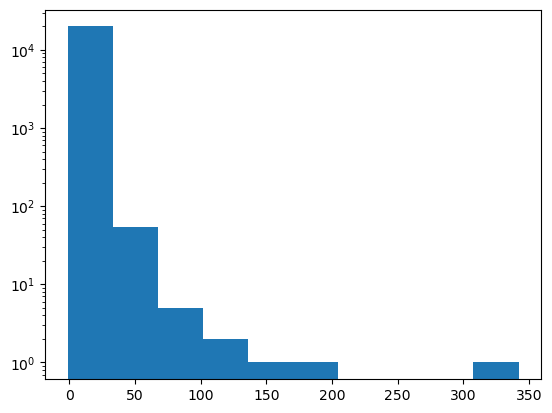

(-0.4879643903300654, 0.00976143959508836, 0.9995635363487063)

In [7]:
sample = genextreme.rvs(c=-0.5, loc=0, scale=1, size=20000)
plt.hist(sample, log=True)
plt.show()
fit = genextreme.fit(sample)
fit


Rq: genextreme package fits well rvs

## Get frechet and student samples and fit with genextreme

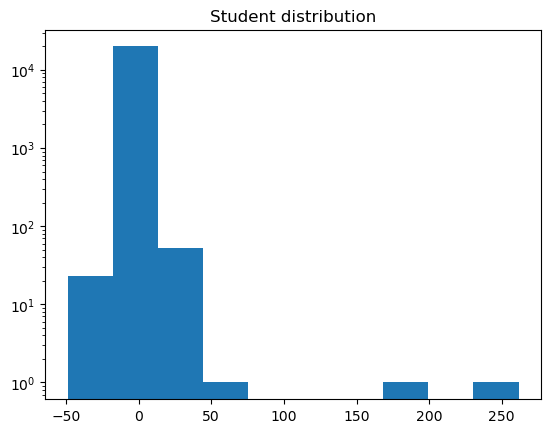

(0.02249470093877555, -1.2874732075316726, 6.105716423349991)


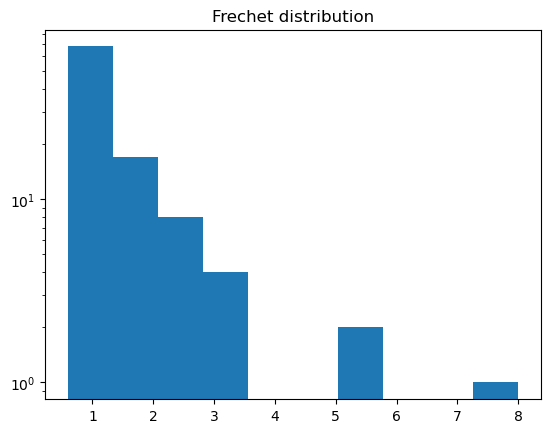

(-0.47020963939402516, 0.9877022329662679, 0.33377325583908257)


In [12]:
sample_student = get_student_sample(2,20000)
sample_frechet = get_frechet_sample(3, 100)

plt.hist(sample_student, log=True)
plt.title("Student distribution")
plt.show()
fit = genextreme.fit(sample_student)
print(fit) # Le fit de student marche assez mal...
plt.hist(sample_frechet, log=True)
plt.title("Frechet distribution")
plt.show()
fit = genextreme.fit(sample_frechet)
print(fit)

Rq: The Student rvs does not fit well 

# First try on dependent data, 
- Get ONE dependent data series 
- Get bloc maxima for several block sized
- Fit a gev for each series of block maxima

To check the distribution of the block maxima estimation

In [5]:
from extreme_utils import *
import matplotlib.pyplot as plt
from random import choices
%matplotlib inline

# Rewrite functions for bootstrap estimation

def get_block_max_series(sample,block_size):
    sliding_block_series = list()
    for i in range(0, len(sample)-block_size):
        sliding_block = sample[i:i+block_size]
        sliding_block_series.append(np.max(sliding_block))
    disjoint_block_series = list()
    for i in range(0, len(sample)-block_size,block_size):
        disjoint_block = sample[i:i+block_size]
        disjoint_block_series.append(np.max(disjoint_block))
    return sliding_block_series, disjoint_block_series


def get_block_max_c_estimation(inv_gamma, sample,bs_start,bs_end,bs_step):
    dict_results = dict()
    dict_results["block_size_list"] = list()
    dict_results["c_original_list"] = list()
    dict_results["c_sliding_list"] = list()
    dict_results["c_disjoint_list"] = list()
    for bs in range(bs_start,bs_end,bs_step):
        sliding_block_series, disjoint_block_series = get_block_max_series(sample,bs)
        fit_original = -1/inv_gamma
        fit_sliding = genextreme.fit(sliding_block_series)[0]
        fit_disjoint = genextreme.fit(disjoint_block_series)[0]
        dict_results["c_original_list"].append(fit_original)
        dict_results["c_sliding_list"].append(fit_sliding)
        dict_results["c_disjoint_list"].append(fit_disjoint)
        dict_results["block_size_list"].append(bs)
    return dict_results


def get_bootstrap_c_estimations(inv_gamma, sample,bs_start,bs_end,bs_step):
    # In reality there is no bootstrap : make it bootstrap
    dict_results = dict()
    dict_results["block_size_list"] = list()
    dict_results["c_original_list"] = list()
    dict_results["c_sliding_list"] = list()
    dict_results["c_disjoint_list"] = list()
    for bs in range(bs_start,bs_end,bs_step):
        sliding_block_series, disjoint_block_series = get_block_max_series(sample,bs)
        fit_original = -1/inv_gamma
        fit_sliding = genextreme.fit(sliding_block_series)[0]
        fit_disjoint = genextreme.fit(disjoint_block_series)[0]
        dict_results["c_original_list"].append(fit_original)
        dict_results["c_sliding_list"].append(fit_sliding)
        dict_results["c_disjoint_list"].append(fit_disjoint)
        dict_results["block_size_list"].append(bs)
    return dict_results


def get_real_bootstrap_subsample_c_estimations(inv_gamma, sample,bs_start,bs_end,bs_step,ratio_subsample=0.8):
    dict_results = dict()
    dict_results["block_size_list"] = list()
    dict_results["c_original_list"] = list()
    dict_results["c_sliding_list"] = list()
    dict_results["c_disjoint_list"] = list()
    for bs in range(bs_start,bs_end,bs_step):
        sliding_block_series, disjoint_block_series = get_block_max_series(sample,bs)
        subsample_size = int(ratio_subsample*len(sample))
        subsample_sliding_block_series = choices(sliding_block_series,k=subsample_size)
        subsample_disjoint_block_series = choices(disjoint_block_series,k=subsample_size)
        fit_original = -1/inv_gamma
        fit_sliding = genextreme.fit(subsample_sliding_block_series)[0]
        fit_disjoint = genextreme.fit(subsample_disjoint_block_series)[0]
        dict_results["c_original_list"].append(fit_original)
        dict_results["c_sliding_list"].append(fit_sliding)
        dict_results["c_disjoint_list"].append(fit_disjoint)
        dict_results["block_size_list"].append(bs)
    return dict_results


def get_bootstrap_before_max_block_scheme_estimations(inv_gamma, sample, bs_start, bs_end, bs_step):
    dict_results = dict()
    dict_results["block_size_list"] = list()
    dict_results["c_original_list"] = list()
    dict_results["c_sliding_list"] = list()
    dict_results["c_disjoint_list"] = list()
    bootstrap_sample = choices(sample,k=len(sample))
    for bs in range(bs_start,bs_end,bs_step):
        sliding_block_series, disjoint_block_series = get_block_max_series(bootstrap_sample,bs)
        fit_original = -1/inv_gamma
        fit_sliding = genextreme.fit(sliding_block_series)[0]
        fit_disjoint = genextreme.fit(disjoint_block_series)[0]
        dict_results["c_original_list"].append(fit_original)
        dict_results["c_sliding_list"].append(fit_sliding)
        dict_results["c_disjoint_list"].append(fit_disjoint)
        dict_results["block_size_list"].append(bs)
    return dict_results


# order_of_dependency = 5
# inv_gamma = 3
# max_size_blocks = 50
# min_size_sample_bloc_maxima = 50
# n_sample = min_size_sample_bloc_maxima*max_size_blocks

# armax_sample_frechet = get_armax_bucher_segers_2020(inv_gamma, n_sample)
# dict_results = get_bootstrap_c_estimations(armax_sample_frechet,1,max_size_blocks,3)

# plt.plot(dict_results["block_size_list"],dict_results["c_original_list"],label="c_original")
# plt.plot(dict_results["block_size_list"],dict_results["c_sliding_list"],label="c_sliding")
# plt.plot(dict_results["block_size_list"],dict_results["c_disjoint_list"],label="c_disjoint")
# plt.title("C parameter estimation for block lists")
# plt.legend()
# plt.show()
# plt.clf()

## Try regular several bootstrap on same sample vs on different sample
### With MA of Frechet : same sample

100%|██████████| 6/6 [00:40<00:00,  6.75s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_880\2901031761.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


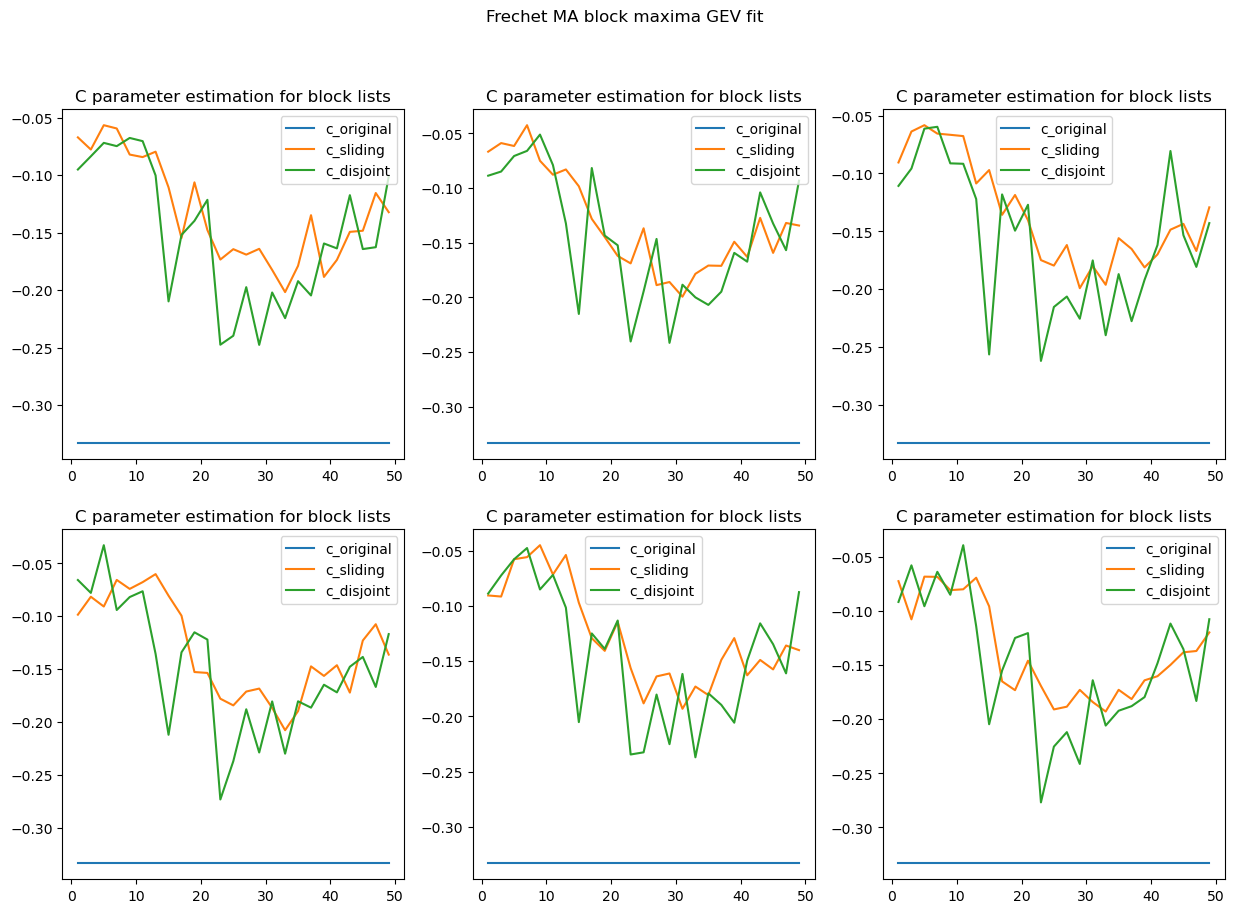

In [4]:
order_of_dependency = 10
inv_gamma = 3
min_size_block = 1
step_blocks = 2
max_size_blocks = 50
min_size_sample_bloc_maxima = 50
n_sample = min_size_sample_bloc_maxima*max_size_blocks

nb_horiz = 3
nb_vert = 2
fig, subplots = plt.subplots(nb_vert, nb_horiz,figsize=(15,10))
fig.suptitle('Frechet MA block maxima GEV fit')
ma_sample_frechet = get_ma_sample(inv_gamma, n_sample, order_of_dependency,distrib="frechet")

for i in tqdm(range(nb_vert * nb_horiz)):
    dict_results = get_real_bootstrap_subsample_c_estimations(inv_gamma, ma_sample_frechet,min_size_block,max_size_blocks,step_blocks,
                                                                    ratio_subsample=1)
    coord_vert = i//nb_horiz
    coord_hor = i%nb_horiz
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_original_list"],label="c_original")
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_sliding_list"],label="c_sliding")
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_disjoint_list"],label="c_disjoint")
    subplots[coord_vert][coord_hor].set_title("C parameter estimation for block lists")
    subplots[coord_vert][coord_hor].legend()
fig.show()

### With MA of Frechet : different samples

100%|██████████| 6/6 [00:38<00:00,  6.46s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_880\1720015560.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


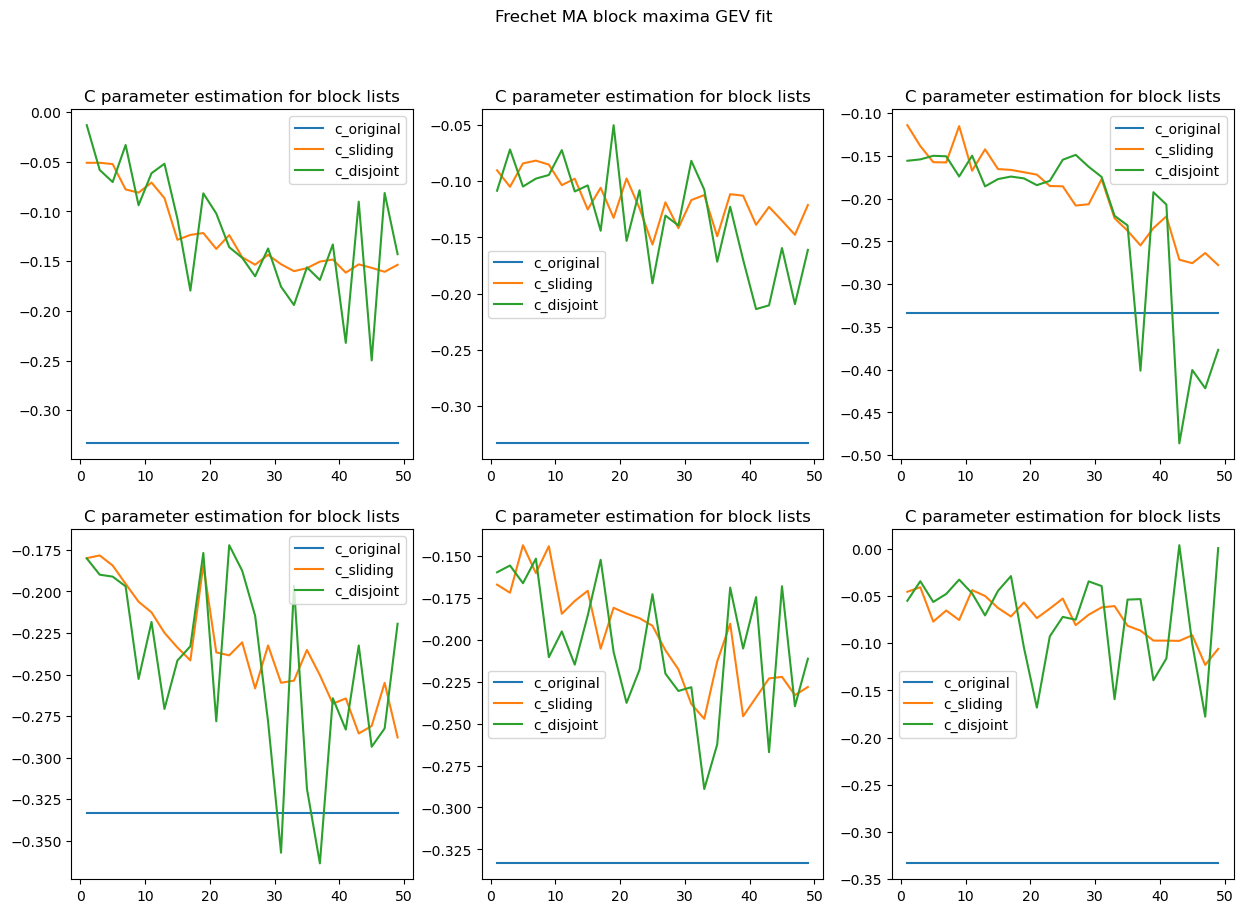

In [5]:
order_of_dependency = 10
inv_gamma = 3
min_size_block = 1
step_blocks = 2
max_size_blocks = 50
min_size_sample_bloc_maxima = 50
n_sample = min_size_sample_bloc_maxima*max_size_blocks

nb_horiz = 3
nb_vert = 2
fig, subplots = plt.subplots(nb_vert, nb_horiz,figsize=(15,10))
fig.suptitle('Frechet MA block maxima GEV fit')

for i in tqdm(range(nb_vert * nb_horiz)):
    ma_sample_frechet = get_ma_sample(inv_gamma, n_sample, order_of_dependency,distrib="frechet")
    dict_results = get_real_bootstrap_subsample_c_estimations(inv_gamma, ma_sample_frechet,min_size_block,max_size_blocks,step_blocks,
                                                                    ratio_subsample=1)
    coord_vert = i//nb_horiz
    coord_hor = i%nb_horiz
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_original_list"],label="c_original")
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_sliding_list"],label="c_sliding")
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_disjoint_list"],label="c_disjoint")
    subplots[coord_vert][coord_hor].set_title("C parameter estimation for block lists")
    subplots[coord_vert][coord_hor].legend()
fig.show()

# Check stability of bootstrap

## Try with MA of Frechet

100%|██████████| 6/6 [00:37<00:00,  6.19s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_880\4281180852.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


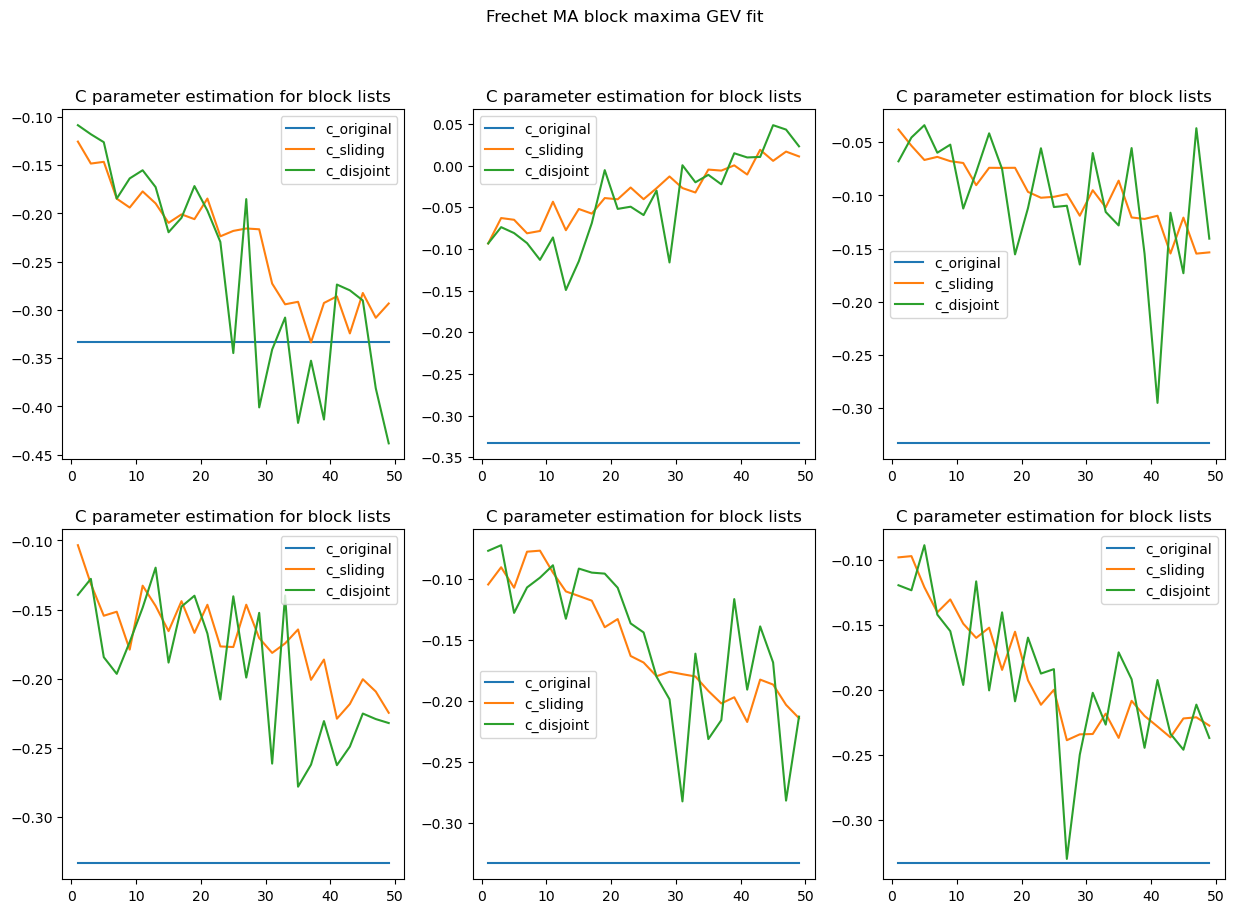

In [6]:
order_of_dependency = 10
inv_gamma = 3
min_size_block = 1
step_blocks = 2
max_size_blocks = 50
min_size_sample_bloc_maxima = 50
n_sample = min_size_sample_bloc_maxima*max_size_blocks

nb_horiz = 3
nb_vert = 2
fig, subplots = plt.subplots(nb_vert, nb_horiz,figsize=(15,10))
fig.suptitle('Frechet MA block maxima GEV fit')

for i in tqdm(range(nb_vert * nb_horiz)):
    ma_sample_frechet = get_ma_sample(inv_gamma, n_sample, order_of_dependency,distrib="frechet")
    dict_results = get_real_bootstrap_subsample_c_estimations(inv_gamma,ma_sample_frechet,min_size_block,max_size_blocks,step_blocks,
                                                                    ratio_subsample=1)
    coord_vert = i//nb_horiz
    coord_hor = i%nb_horiz
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_original_list"],label="c_original")
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_sliding_list"],label="c_sliding")
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_disjoint_list"],label="c_disjoint")
    subplots[coord_vert][coord_hor].set_title("C parameter estimation for block lists")
    subplots[coord_vert][coord_hor].legend()
fig.show()

Rq : 
- Comportement du BM estimator très variable selon l'échantillon -> faire du monte_carlo
- l'estimation du paramètre c est variable selon l'échantillon : passer à des lois de frechet exactes

## Try with Moving Max of Frechet

100%|██████████| 6/6 [02:05<00:00, 20.85s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_880\2675600970.py:29: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


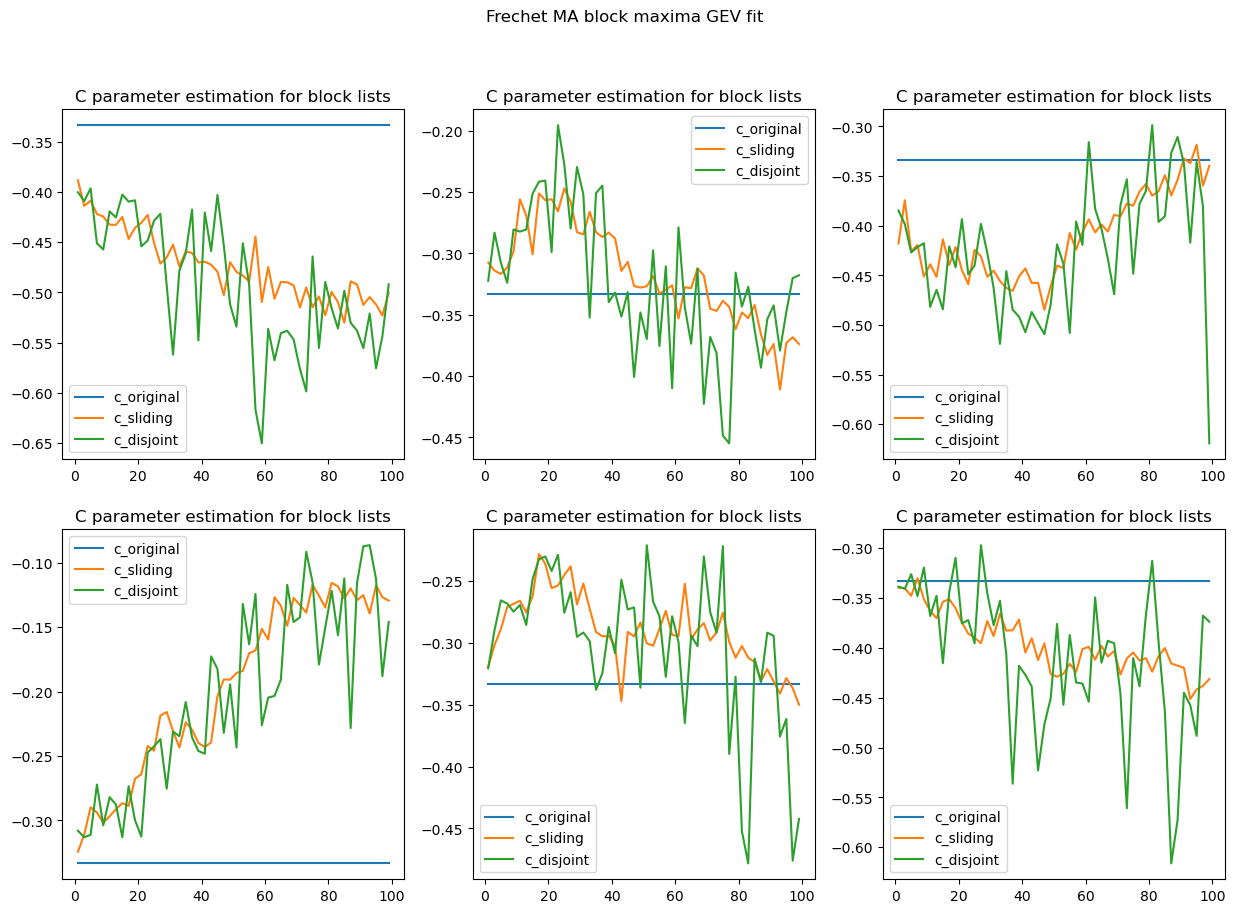

In [7]:
# For max frechet
# n_sample = 30_000

order_of_dependency = 10
inv_gamma = 3
min_size_block = 1
step_blocks = 2
max_size_blocks = 100
min_size_sample_bloc_maxima = 50
n_sample = min_size_sample_bloc_maxima*max_size_blocks

nb_horiz = 3
nb_vert = 2
fig, subplots = plt.subplots(nb_vert, nb_horiz,figsize=(15,10))
fig.suptitle('Frechet MA block maxima GEV fit')


for i in tqdm(range(nb_vert * nb_horiz)):
    mov_max_sample_frechet = get_dependant_frechet_max(inv_gamma, n_sample, order_of_dependency,distrib="frechet")
    dict_results = get_real_bootstrap_subsample_c_estimations(inv_gamma,mov_max_sample_frechet,min_size_block,max_size_blocks,step_blocks,
                                                                    ratio_subsample=1)
    coord_vert = i//nb_horiz
    coord_hor = i%nb_horiz
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_original_list"],label="c_original")
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_sliding_list"],label="c_sliding")
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_disjoint_list"],label="c_disjoint")
    subplots[coord_vert][coord_hor].set_title("C parameter estimation for block lists")
    subplots[coord_vert][coord_hor].legend()
fig.show()


Rq : 
- Toujours un comportement assez variant selon l'échantillon : il faut stabiliser avec du MC

## Try with Armax (like in Bucher Segers paper Inference for heavy tailed stationary time series based on sliding blocks)

  0%|          | 0/6 [00:05<?, ?it/s]


KeyboardInterrupt: 

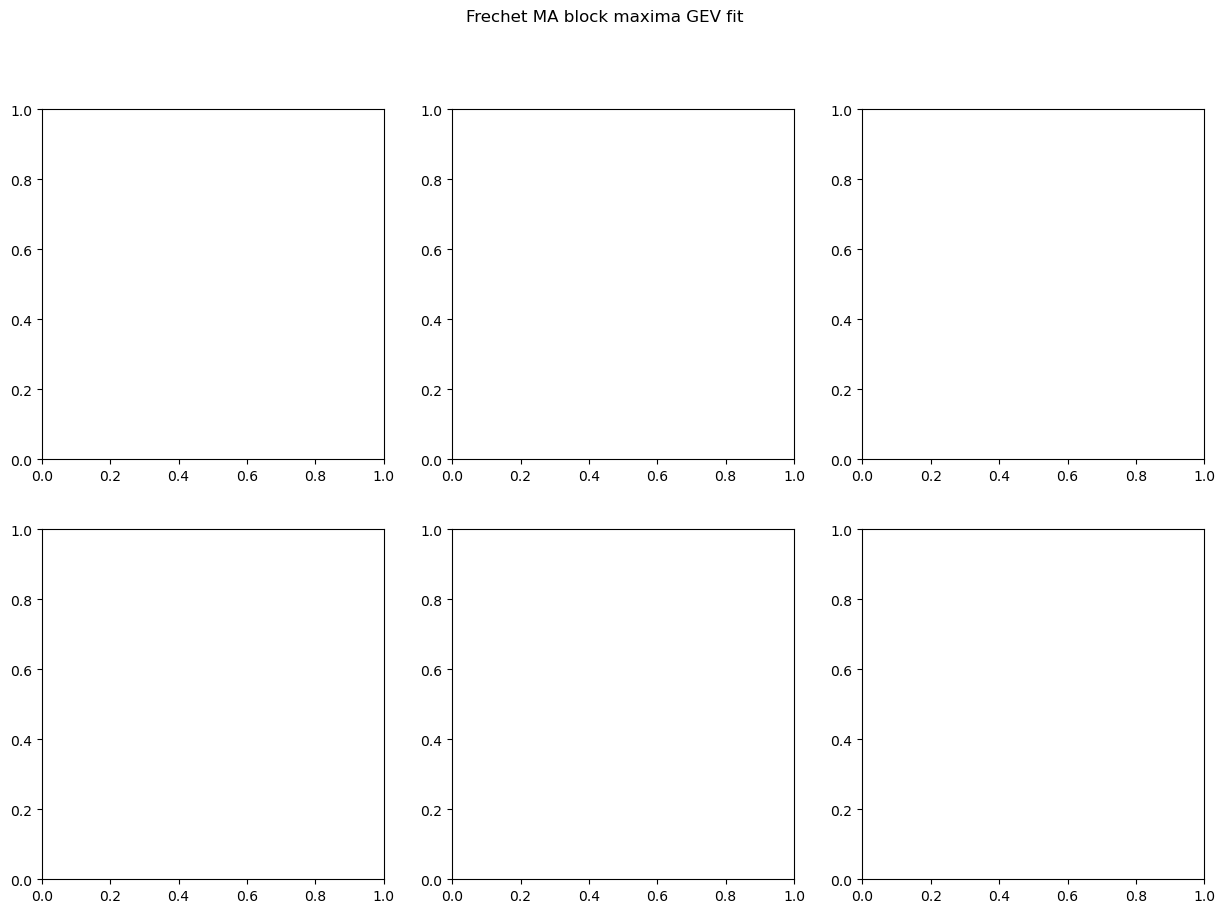

In [14]:
from extreme_utils import *
import matplotlib.pyplot as plt


inv_gamma = 3
min_size_block = 1
step_blocks = 2
max_size_blocks = 100
min_size_sample_bloc_maxima = 50
n_sample = min_size_sample_bloc_maxima*max_size_blocks

nb_horiz = 3
nb_vert = 2
fig, subplots = plt.subplots(nb_vert, nb_horiz,figsize=(15,10))
fig.suptitle('Frechet MA block maxima GEV fit')


for i in tqdm(range(nb_vert * nb_horiz)):
    armax_sample = get_armax_bucher_segers_2020(inv_gamma, n_sample)
    dict_results = get_real_bootstrap_subsample_c_estimations(inv_gamma,armax_sample,min_size_block,max_size_blocks,step_blocks,
                                                                    ratio_subsample=1)
    coord_vert = i//nb_horiz
    coord_hor = i%nb_horiz
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_original_list"],label="c_original")
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_sliding_list"],label="c_sliding")
    subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_disjoint_list"],label="c_disjoint")
    subplots[coord_vert][coord_hor].set_title("C parameter estimation for block lists")
    subplots[coord_vert][coord_hor].legend()
fig.show()


Rq : 
- Idem : à stabiliser avec du MC

# Get bootstrap sample vs MC estimation
- Get several samples of dependent data and for each:
    - Get block maxima series for several block size
    - Fit a GEV on the BM series
- Get mean of each estimation (accross block_sizes) to get the mean estimation of the estimator GEV ML BM for a given block size
- Get variance (accross block_sizes)

In [20]:
def get_monte_carlo_bootstrap_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True):
    nb_monte_carlo_estimations = args_monte_carlo["nb_monte_carlo_estimations"]
    start_block = args_monte_carlo["start_block"]
    max_size_blocks = args_monte_carlo["max_size_blocks"]
    step_block = args_monte_carlo["step_block"]
    inv_gamma = args_sampler[0]

    for mc in tqdm(range(nb_monte_carlo_estimations)):
        sample = sampler(*args_sampler)
        dict_results = get_real_bootstrap_subsample_c_estimations(inv_gamma,sample,start_block,max_size_blocks,step_block,
                                                                    ratio_subsample=1)
        if mc == 0:
            c_original_results = np.array([dict_results['c_original_list']])
            c_sliding_results = np.array([dict_results['c_sliding_list']])
            c_disjoint_results = np.array([dict_results['c_disjoint_list']])
        else:
            c_original_results = np.append(c_original_results,[ dict_results['c_original_list']],0)
            c_sliding_results = np.append(c_sliding_results, [dict_results['c_sliding_list']],0)
            c_disjoint_results = np.append(c_disjoint_results, [dict_results['c_disjoint_list']],0)
    c_original_final_list = np.mean(c_original_results,axis=0)
    c_sliding_final_list = np.mean(c_sliding_results,axis=0)
    c_disjoint_final_list = np.mean(c_disjoint_results,axis=0)
    c_original_final_errors = np.std(c_original_results,axis=0)
    c_sliding_final_errors = np.std(c_sliding_results,axis=0)
    c_disjoint_final_errors = np.std(c_disjoint_results,axis=0)
    if make_plots:
        block_size_list = dict_results["block_size_list"]
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_figheight(5)
        fig.set_figwidth(20)
        fig.suptitle('Biais and variance subplots')
        ax1.plot(block_size_list, c_sliding_final_list - c_original_final_list, label="sliding biais")
        ax1.plot(block_size_list, c_disjoint_final_list - c_original_final_list, label="disjoint biais")
        ax1.set_title("Biais")
        ax1.legend()
        ax2.plot(block_size_list, c_sliding_final_errors, label="sliding std")
        ax2.plot(block_size_list, c_disjoint_final_errors, label="disjoint std")
        ax2.set_title("Variance")
        ax2.legend()

        ax3.errorbar(block_size_list,c_original_final_list,c_original_final_errors,label="c_original",alpha=0.7)
        ax3.errorbar(block_size_list,c_sliding_final_list,c_sliding_final_errors,label="c_sliding",alpha=0.7)
        ax3.errorbar(block_size_list,c_disjoint_final_list,c_disjoint_final_errors,label="c_disjoint",alpha=0.7)
        ax3.set_title("Bootstrap estimation of c parameter")
        ax3.legend()


        fig.show()
        # block_size_list = dict_results["block_size_list"]
        # plt.errorbar(block_size_list,c_original_final_list,c_original_final_errors,label="c_original",alpha=0.7)
        # plt.errorbar(block_size_list,c_sliding_final_list,c_sliding_final_errors,label="c_sliding",alpha=0.7)
        # plt.errorbar(block_size_list,c_disjoint_final_list,c_disjoint_final_errors,label="c_disjoint",alpha=0.7)
        # plt.title("Monte_carlo estimation and bootstrap estimation of c parameter")
        # plt.legend()
        # plt.show()
        # plt.clf()

        # fig, (ax1, ax2) = plt.subplots(1, 2)
        # fig.suptitle('Biais and variance subplots')
        # ax1.plot(block_size_list, c_sliding_final_list - c_original_final_list, label="sliding biais")
        # ax1.plot(block_size_list, c_disjoint_final_list - c_original_final_list, label="disjoint biais")
        # ax1.set_title("Biais")
        # ax1.legend()
        # ax2.plot(block_size_list, c_sliding_final_errors, label="sliding std")
        # ax2.plot(block_size_list, c_disjoint_final_errors, label="disjoint std")
        # ax2.set_title("Variance")
        # ax2.legend()
        # fig.show()
    return {'c_original_final_list': c_original_final_list,
            'c_sliding_final_list': c_sliding_final_list,
            'c_disjoint_final_list': c_disjoint_final_list}


# args_monte_carlo = {
#     'nb_monte_carlo_estimations': 2,
#     'max_size_blocks': 10,
#     'min_size_sample_bloc_maxima': 40,
#     'start_block': 1,
#     'step_block': 1
# }
# # order_of_dependency = 5 # Not used in armax
# sampler = get_armax_bucher_segers_2020
# args_sampler = [3,
#                 args_monte_carlo['min_size_sample_bloc_maxima']*args_monte_carlo['max_size_blocks']]

# _ = get_monte_carlo_bootstrap_c_estimations(sampler,
#                                             args_sampler,
#                                             args_monte_carlo,
#                                             make_plots=True)



## Armax monte carlo bootstrap estimations

In [21]:
# Apply function and get a monte_carlo estimation of bootstrap estimators

# nb_monte_carlo_estimations = 40

# order_of_dependency = 5 # Not used in armax
# inv_gamma = 3
# max_size_blocks = 50
# min_size_sample_bloc_maxima = 40
# n_sample = min_size_sample_bloc_maxima*max_size_blocks
# start_block = 1
# step_block = 1


args_monte_carlo = {
    'nb_monte_carlo_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_armax_bucher_segers_2020
args_sampler = [3,
                args_monte_carlo['min_size_sample_bloc_maxima']*args_monte_carlo['max_size_blocks']]

_ = get_monte_carlo_bootstrap_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True)

 10%|█         | 10/100 [01:40<15:04, 10.05s/it]


KeyboardInterrupt: 

In [ ]:
args_monte_carlo = {
    'nb_monte_carlo_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_armax_bucher_segers_2020
args_sampler = [3,
                args_monte_carlo['min_size_sample_bloc_maxima']*args_monte_carlo['max_size_blocks']]

_ = get_monte_carlo_bootstrap_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True)

## Moving Max Frechet Monte Carlo bootstrap estimations

100%|██████████| 500/500 [51:26<00:00,  6.17s/it]


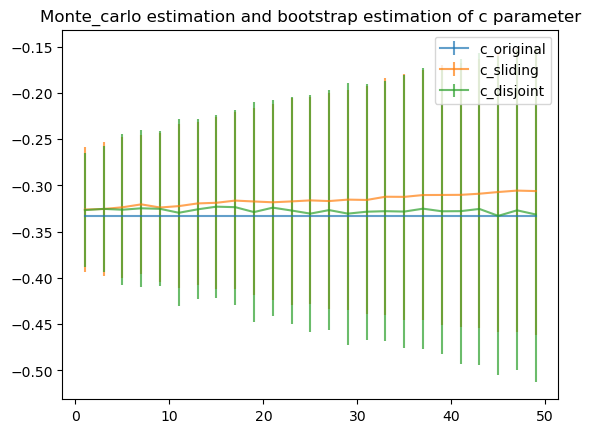

C:\Users\Antoine\AppData\Local\Temp\ipykernel_880\391260524.py:48: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

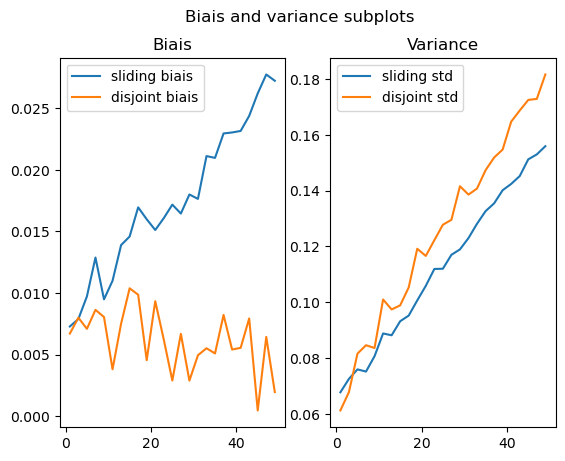

In [11]:
nb_monte_carlo_estimations = 500
order_of_dependency = 10
inv_gamma = 3

args_monte_carlo = {
    'nb_monte_carlo_estimations': nb_monte_carlo_estimations,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 2
}
sampler = get_dependant_frechet_max
args_sampler = [inv_gamma,
                args_monte_carlo['min_size_sample_bloc_maxima']*args_monte_carlo['max_size_blocks'],
                order_of_dependency]

_ = get_monte_carlo_bootstrap_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True)


### Moving Max Zoom sur la zone 0 : 30

In [12]:

nb_monte_carlo_estimations = 500
order_of_dependency = 10
inv_gamma = 3



args_monte_carlo = {
    'nb_monte_carlo_estimations': nb_monte_carlo_estimations,
    'max_size_blocks': 30,
    'min_size_sample_bloc_maxima': 100,
    'start_block': 1,
    'step_block': 2
}
sampler = get_dependant_frechet_max
args_sampler = [inv_gamma,
                args_monte_carlo['min_size_sample_bloc_maxima']*args_monte_carlo['max_size_blocks'],
                order_of_dependency]

_ = get_monte_carlo_bootstrap_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True)


 78%|███████▊  | 391/500 [32:38<09:05,  5.01s/it]


KeyboardInterrupt: 

## Moving Max Frechet : ordre de dépendance plus faible (2) : Zoom sur la zone 0:30

100%|██████████| 500/500 [1:44:49<00:00, 12.58s/it]


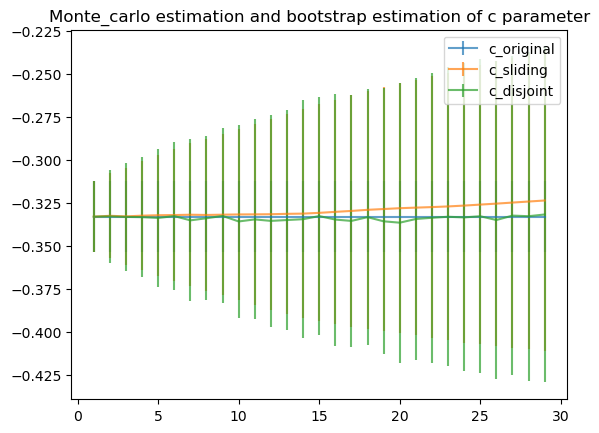

C:\Users\Antoine\AppData\Local\Temp\ipykernel_5404\785123063.py:47: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 640x480 with 0 Axes>

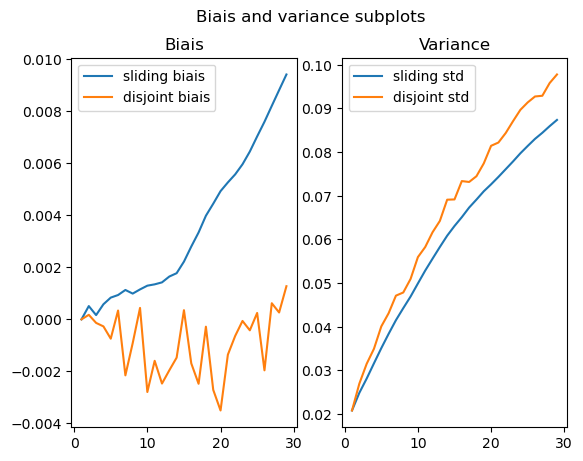

In [ ]:
nb_monte_carlo_estimations = 500
order_of_dependency = 2
inv_gamma = 3
step_block = 1


args_monte_carlo = {
    'nb_monte_carlo_estimations': nb_monte_carlo_estimations,
    'max_size_blocks': 30,
    'min_size_sample_bloc_maxima': 100,
    'start_block': 1,
    'step_block': step_block
}
sampler = get_dependant_frechet_max
args_sampler = [inv_gamma,
                args_monte_carlo['min_size_sample_bloc_maxima']*args_monte_carlo['max_size_blocks'],
                order_of_dependency]

_ = get_monte_carlo_bootstrap_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True)


## Moving Max Frechet : ordre de dépendance plus grand : (20)

In [ ]:
nb_monte_carlo_estimations = 500
order_of_dependency = 20
inv_gamma = 3
step_block = 1


args_monte_carlo = {
    'nb_monte_carlo_estimations': nb_monte_carlo_estimations,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 100,
    'start_block': 1,
    'step_block': step_block
}
sampler = get_dependant_frechet_max
args_sampler = [inv_gamma,
                args_monte_carlo['min_size_sample_bloc_maxima']*args_monte_carlo['max_size_blocks'],
                order_of_dependency]

_ = get_monte_carlo_bootstrap_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True)


 85%|████████▌ | 427/500 [5:12:40<1:30:54, 74.71s/it]  

## MA frechet Monte Carlo bootstrap estimation

  0%|          | 0/150 [00:00<?, ?it/s]

100%|██████████| 150/150 [26:23<00:00, 10.56s/it]


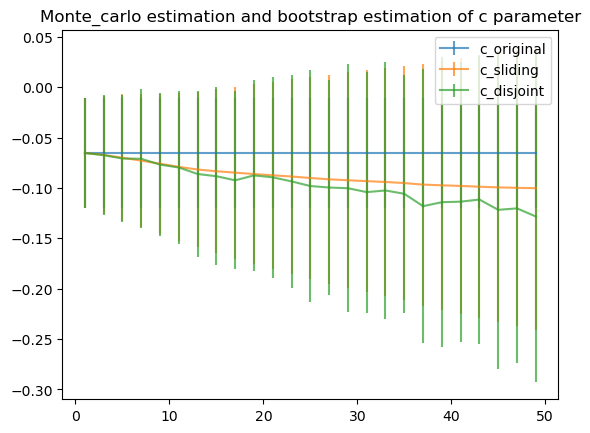

C:\Users\Antoine\AppData\Local\Temp\ipykernel_11716\2716906417.py:100: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'c_original_final_list': array([-0.06528639, -0.06528639, -0.06528639, -0.06528639, -0.06528639,
        -0.06528639, -0.06528639, -0.06528639, -0.06528639, -0.06528639,
        -0.06528639, -0.06528639, -0.06528639, -0.06528639, -0.06528639,
        -0.06528639, -0.06528639, -0.06528639, -0.06528639, -0.06528639,
        -0.06528639, -0.06528639, -0.06528639, -0.06528639, -0.06528639]),
 'c_sliding_final_list': array([-0.06530411, -0.06717533, -0.07000207, -0.07287726, -0.0758779 ,
        -0.07906279, -0.08167909, -0.08341178, -0.08476312, -0.08616804,
        -0.0874379 , -0.08861465, -0.09009751, -0.09140929, -0.09235102,
        -0.09322795, -0.09404682, -0.0951398 , -0.09666715, -0.09735912,
        -0.09798334, -0.09874611, -0.09941928, -0.09985642, -0.10023182]),
 'c_disjoint_final_list': array([-0.06530411, -0.06741951, -0.07076373, -0.07101181, -0.07681691,
        -0.07966411, -0.08613389, -0.08833339, -0.09238206, -0.08752841,
        -0.08943703, -0.09347515, -0.09807806,

<Figure size 640x480 with 0 Axes>

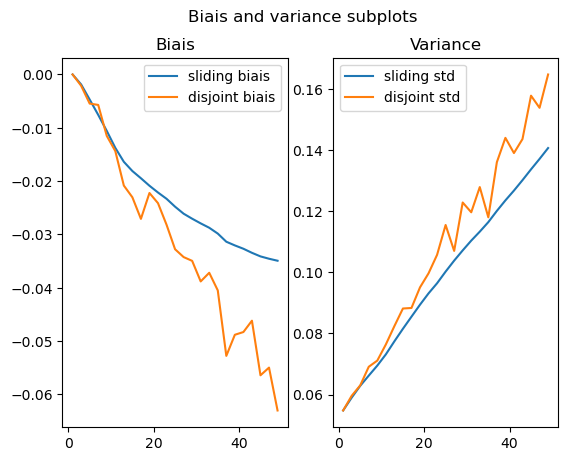

In [ ]:

# nb_monte_carlo_estimations = 40

# order_of_dependency = 10
# inv_gamma = 3
# max_size_blocks = 50
# min_size_sample_bloc_maxima = 40
# n_sample = min_size_sample_bloc_maxima*max_size_blocks
# start_block = 1
# step_block = 1


args_monte_carlo = {
    'nb_monte_carlo_estimations': 150,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 2
}
sampler = get_ma_sample
args_sampler = [3,
                args_monte_carlo['min_size_sample_bloc_maxima']*args_monte_carlo['max_size_blocks'],
                10]

get_monte_carlo_bootstrap_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True)

# for mc in tqdm(range(nb_monte_carlo_estimations)):
#     ma_sample_frechet = get_ma_sample(inv_gamma, n_sample, order_of_dependency,distrib="frechet")
#     dict_results = get_bootstrap_c_estimations(ma_sample_frechet,start_block,max_size_blocks,step_block)
#     if mc == 0:
#         c_original_results = np.array([dict_results['c_original_list']])
#         c_sliding_results = np.array([dict_results['c_sliding_list']])
#         c_disjoint_results = np.array([dict_results['c_disjoint_list']])
#     else:
#         c_original_results = np.append(c_original_results,[ dict_results['c_original_list']],0)
#         c_sliding_results = np.append(c_sliding_results, [dict_results['c_sliding_list']],0)
#         c_disjoint_results = np.append(c_disjoint_results, [dict_results['c_disjoint_list']],0)
# c_original_final_list = np.mean(c_original_results,axis=0)
# c_sliding_final_list = np.mean(c_sliding_results,axis=0)
# c_disjoint_final_list = np.mean(c_disjoint_results,axis=0)
# c_original_final_errors = np.std(c_original_results,axis=0)
# c_sliding_final_errors = np.std(c_sliding_results,axis=0)
# c_disjoint_final_errors = np.std(c_disjoint_results,axis=0)

# block_size_list = dict_results["block_size_list"]
# plt.errorbar(block_size_list,c_original_final_list,c_original_final_errors,label="c_original",alpha=0.7)
# plt.errorbar(block_size_list,c_sliding_final_list,c_sliding_final_errors,label="c_sliding",alpha=0.7)
# plt.errorbar(block_size_list,c_disjoint_final_list,c_disjoint_final_errors,label="c_disjoint",alpha=0.7)
# plt.title("Monte_carlo estimation and bootstrap estimation of c parameter")
# plt.legend()
# plt.show()
# plt.clf()

# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(block_size_list, c_sliding_final_list - c_original_final_list, label="sliding biais")
# ax1.plot(block_size_list, c_disjoint_final_list - c_original_final_list, label="disjoint biais")
# ax1.set_title("Biais")
# ax1.legend()
# ax2.plot(block_size_list, c_sliding_final_errors, label="sliding std")
# ax2.plot(block_size_list, c_disjoint_final_errors, label="disjoint std")
# ax2.set_title("Std")
# ax2.legend()
# fig.show()


# Check if results are more stable with subsampling

In [3]:
order_of_dependency = 10
inv_gamma = 3
min_size_block = 1
step_blocks = 2
max_size_blocks = 50
min_size_sample_bloc_maxima = 50
n_sample = min_size_sample_bloc_maxima*max_size_blocks


nb_mc_smoothing = 50


for subsample_ratio in tqdm([0.2,0.4,0.6,0.8]):
    print(f"Sumbsample ratio is {subsample_ratio}")
    list_estimations_dict = list()
    for j in range(nb_mc_smoothing):
        ma_sample_frechet = get_ma_sample(inv_gamma, n_sample, order_of_dependency,distrib="frechet")
        dict_results = get_real_bootstrap_subsample_c_estimations(inv_gamma, ma_sample_frechet,min_size_block,max_size_blocks,step_blocks,
                                                                    ratio_subsample=subsample_ratio)
        list_estimations_dict.append(dict_results)
    list_of_list_sliding = [d["c_sliding_list"] for d in list_estimations_dict]
    ar_of_list_sliding = np.array(list_of_list_sliding)
    list_of_list_disjoint = [d["c_disjoint_list"] for d in list_estimations_dict]
    ar_of_list_disjoint = np.array(list_of_list_disjoint)
    ar_var_sliding = ar_of_list_sliding.var(axis=0)
    ar_var_disjoint = ar_of_list_disjoint.var(axis=0)
    plt.plot(dict_results["block_size_list"],ar_var_sliding,label=f"sliding_subsample_{subsample_ratio}")
    plt.plot(dict_results["block_size_list"],ar_var_disjoint,label=f"disjoint_subsample_{subsample_ratio}")
plt.legend()
plt.show()



        # coord_vert = i//nb_horiz
        # coord_hor = i%nb_horiz
        # subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_original_list"],label="c_original")
        # subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_sliding_list"],label="c_sliding")
        # subplots[coord_vert][coord_hor].plot(dict_results["block_size_list"],dict_results["c_disjoint_list"],label="c_disjoint")
        # subplots[coord_vert][coord_hor].set_title("C parameter estimation for block lists")
        # subplots[coord_vert][coord_hor].legend()

  0%|          | 0/4 [00:00<?, ?it/s]

Sumbsample ratio is 0.2


  0%|          | 0/4 [00:31<?, ?it/s]


KeyboardInterrupt: 

# Check if bootstrapping on a single sample is meaningfull (check on 6 different samples)

In [3]:
def get_biais_variance_bootstrap(sampler,
                                 args_sampler,
                                 args_bootstrap,
                                 make_plots=True):
    nb_bootstrap_estimations = args_bootstrap["nb_bootstrap_estimations"]
    start_block = args_bootstrap["start_block"]
    max_size_blocks = args_bootstrap["max_size_blocks"]
    step_block = args_bootstrap["step_block"]
    inv_gamma = args_sampler[0]

    sample = sampler(*args_sampler)
    for btstrap in tqdm(range(nb_bootstrap_estimations)):
        dict_results = get_real_bootstrap_subsample_c_estimations(inv_gamma,sample,start_block,max_size_blocks,step_block,
                                                                    ratio_subsample=1)
        if btstrap == 0:
            c_original_results = np.array([dict_results['c_original_list']])
            c_sliding_results = np.array([dict_results['c_sliding_list']])
            c_disjoint_results = np.array([dict_results['c_disjoint_list']])
        else:
            c_original_results = np.append(c_original_results,[ dict_results['c_original_list']],0)
            c_sliding_results = np.append(c_sliding_results, [dict_results['c_sliding_list']],0)
            c_disjoint_results = np.append(c_disjoint_results, [dict_results['c_disjoint_list']],0)
    c_original_final_list = np.mean(c_original_results,axis=0)
    c_sliding_final_list = np.mean(c_sliding_results,axis=0)
    c_disjoint_final_list = np.mean(c_disjoint_results,axis=0)
    c_original_final_errors = np.std(c_original_results,axis=0)
    c_sliding_final_errors = np.std(c_sliding_results,axis=0)
    c_disjoint_final_errors = np.std(c_disjoint_results,axis=0)
    if make_plots:
        # block_size_list = dict_results["block_size_list"]
        # plt.errorbar(block_size_list,c_original_final_list,c_original_final_errors,label="c_original",alpha=0.7)
        # plt.errorbar(block_size_list,c_sliding_final_list,c_sliding_final_errors,label="c_sliding",alpha=0.7)
        # plt.errorbar(block_size_list,c_disjoint_final_list,c_disjoint_final_errors,label="c_disjoint",alpha=0.7)
        # plt.title("Monte_carlo estimation and bootstrap estimation of c parameter")
        # plt.legend()
        # plt.show()
        # plt.clf()

        # fig, (ax1, ax2) = plt.subplots(1, 2)
        # fig.suptitle('Biais and variance subplots')
        # ax1.plot(block_size_list, c_sliding_final_list - c_original_final_list, label="sliding biais")
        # ax1.plot(block_size_list, c_disjoint_final_list - c_original_final_list, label="disjoint biais")
        # ax1.set_title("Biais")
        # ax1.legend()
        # ax2.plot(block_size_list, c_sliding_final_errors, label="sliding std")
        # ax2.plot(block_size_list, c_disjoint_final_errors, label="disjoint std")
        # ax2.set_title("Variance")
        # ax2.legend()
        # fig.show()
        block_size_list = dict_results["block_size_list"]
        

        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_figheight(5)
        fig.set_figwidth(20)
        fig.suptitle('Biais and variance subplots')
        ax1.plot(block_size_list, c_sliding_final_list - c_original_final_list, label="sliding biais")
        ax1.plot(block_size_list, c_disjoint_final_list - c_original_final_list, label="disjoint biais")
        ax1.set_title("Biais")
        ax1.legend()
        ax2.plot(block_size_list, c_sliding_final_errors, label="sliding std")
        ax2.plot(block_size_list, c_disjoint_final_errors, label="disjoint std")
        ax2.set_title("Variance")
        ax2.legend()

        ax3.errorbar(block_size_list,c_original_final_list,c_original_final_errors,label="c_original",alpha=0.7)
        ax3.errorbar(block_size_list,c_sliding_final_list,c_sliding_final_errors,label="c_sliding",alpha=0.7)
        ax3.errorbar(block_size_list,c_disjoint_final_list,c_disjoint_final_errors,label="c_disjoint",alpha=0.7)
        ax3.set_title("Bootstrap estimation of c parameter")
        ax3.legend()


        fig.show()
    return {'c_original_final_list': c_original_final_list,
            'c_sliding_final_list': c_sliding_final_list,
            'c_disjoint_final_list': c_disjoint_final_list}

## Try with armax

100%|██████████| 400/400 [1:11:43<00:00, 10.76s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_880\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


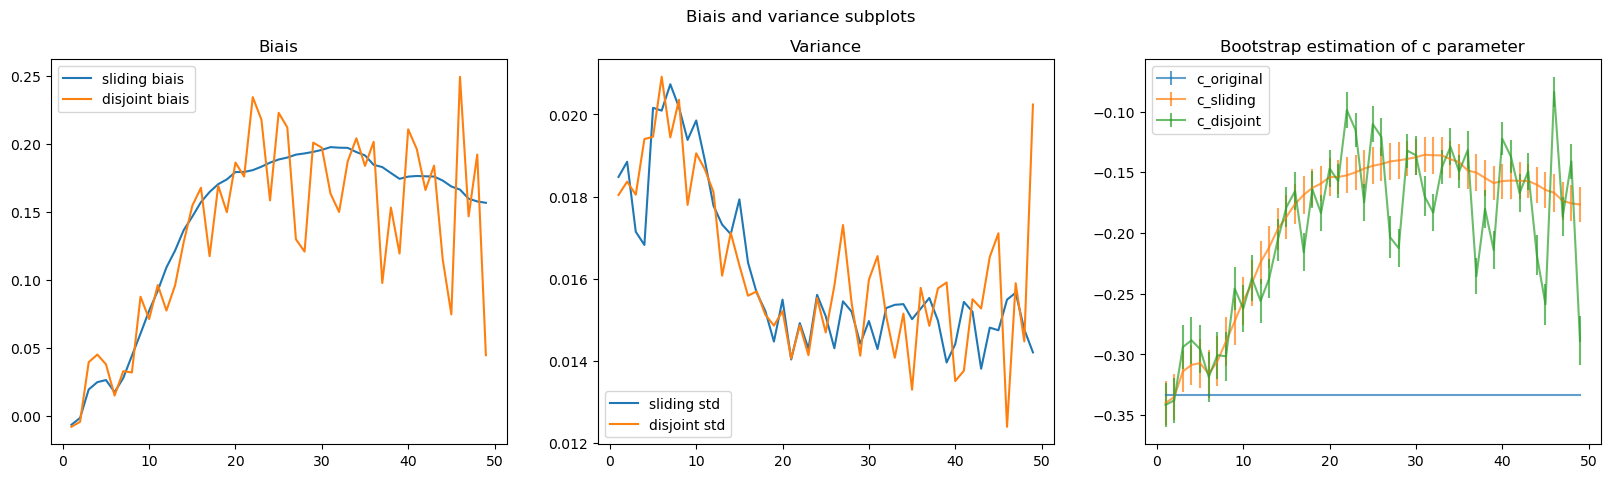

In [43]:
args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_armax_bucher_segers_2020
args_sampler = [3,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [1:09:04<00:00, 10.36s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_880\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


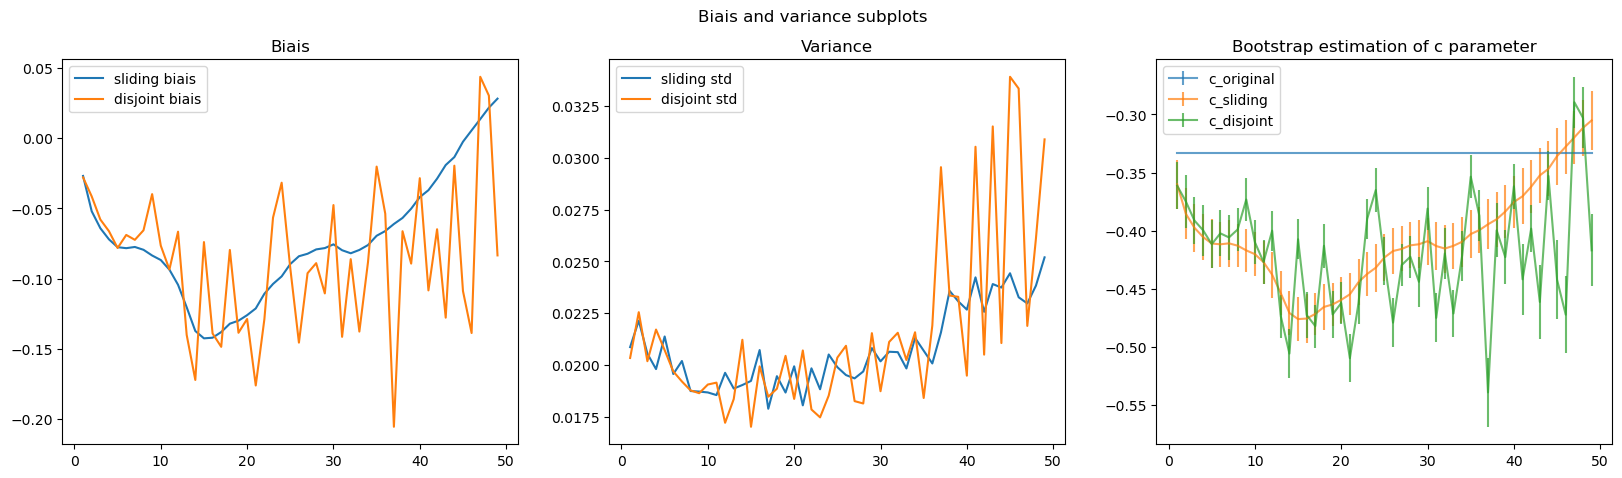

In [44]:
args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_armax_bucher_segers_2020
args_sampler = [3,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                            args_sampler,
                                            args_bootstrap,
                                            make_plots=True)

100%|██████████| 400/400 [1:06:55<00:00, 10.04s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_880\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


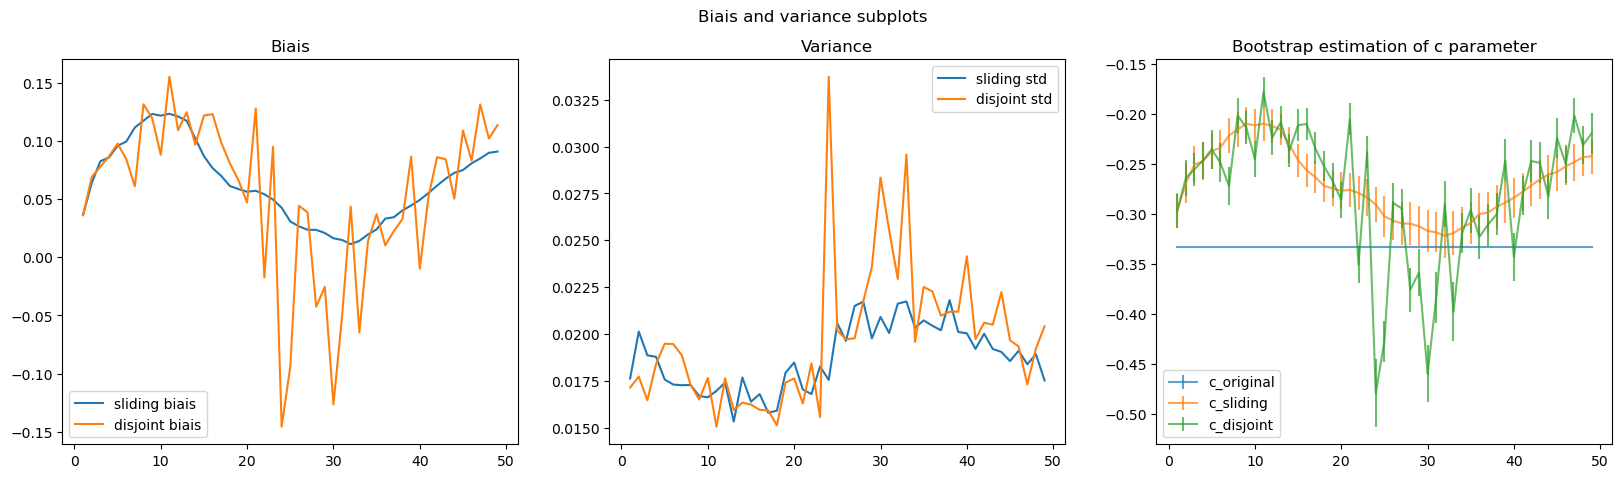

In [45]:
args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_armax_bucher_segers_2020
args_sampler = [3,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                            args_sampler,
                                            args_bootstrap,
                                            make_plots=True)

## Try with moving max Frechet

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [50:41<00:00,  7.60s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_880\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


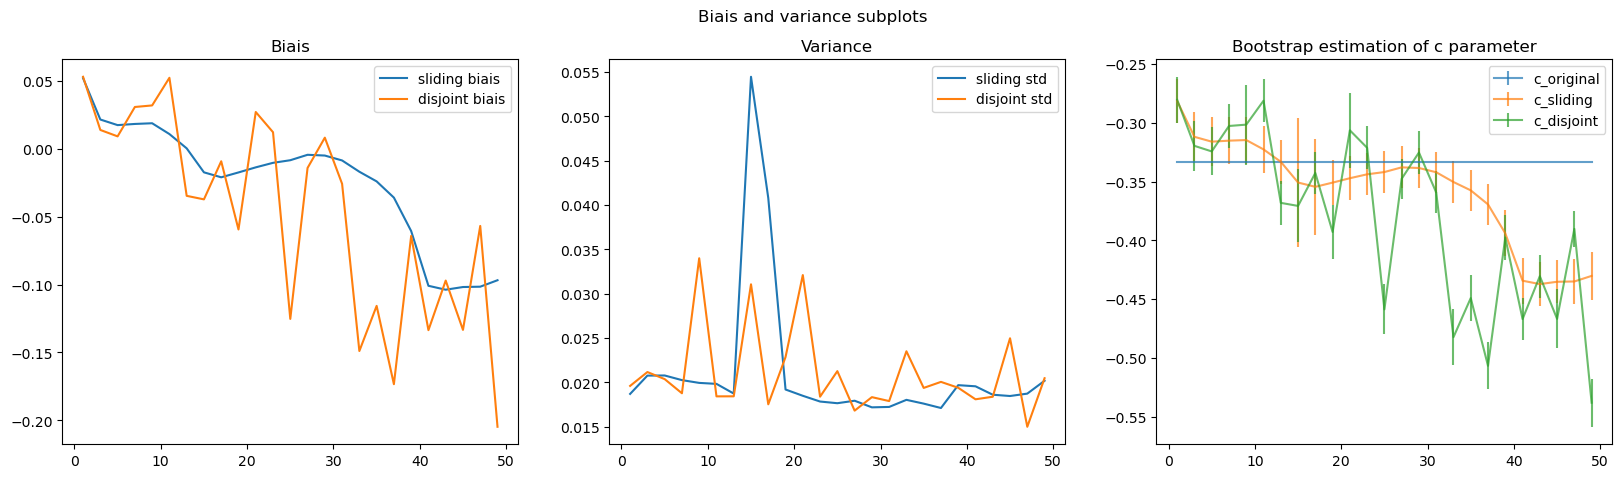

In [46]:
order_of_dependency = 10
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 2
}
sampler = get_dependant_frechet_max
args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks'],
                order_of_dependency]

_ = get_biais_variance_bootstrap(sampler,
                                            args_sampler,
                                            args_bootstrap,
                                            make_plots=True)


  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [52:35<00:00,  7.89s/it] 
C:\Users\Antoine\AppData\Local\Temp\ipykernel_880\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


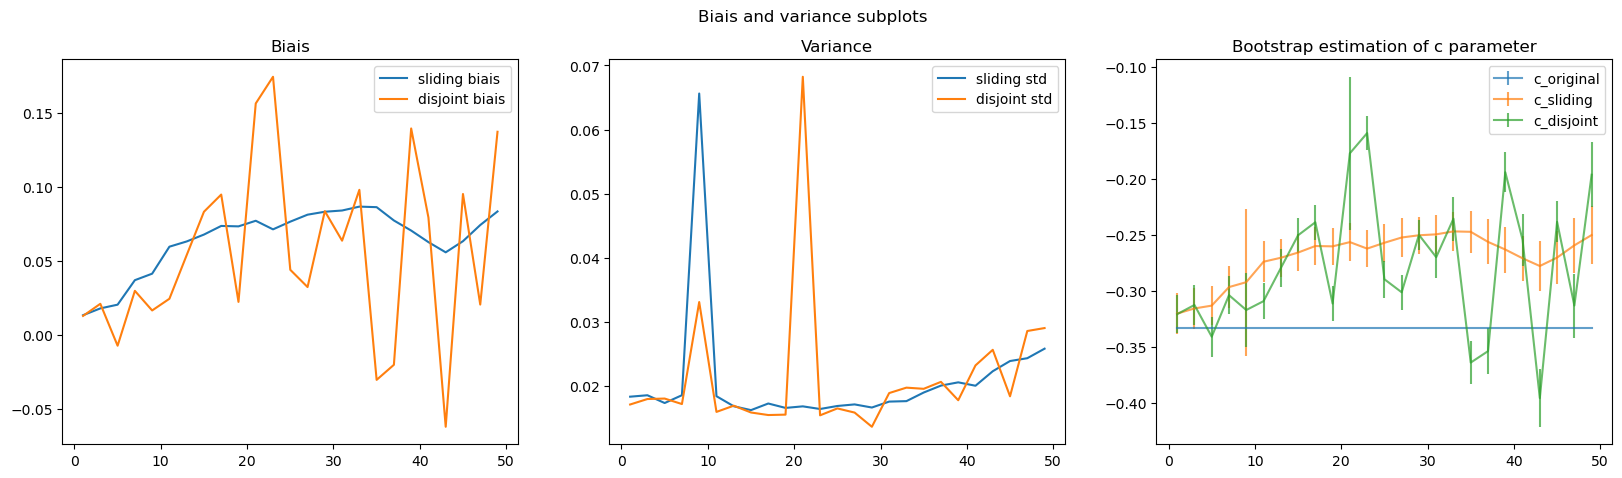

In [47]:
order_of_dependency = 10
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 2
}
sampler = get_dependant_frechet_max
args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks'],
                order_of_dependency]

_ = get_biais_variance_bootstrap(sampler,
                                            args_sampler,
                                            args_bootstrap,
                                            make_plots=True)

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [50:29<00:00,  7.57s/it] 
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8620\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


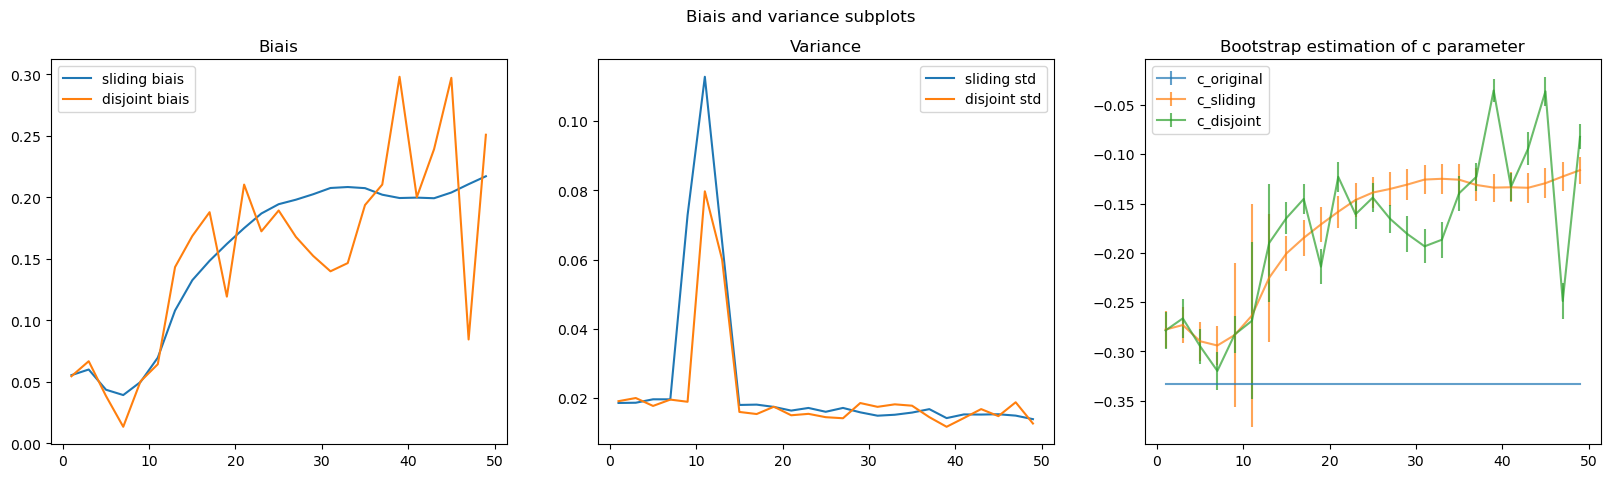

In [5]:
order_of_dependency = 10
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 2
}
sampler = get_dependant_frechet_max
args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks'],
                order_of_dependency]

_ = get_biais_variance_bootstrap(sampler,
                                            args_sampler,
                                            args_bootstrap,
                                            make_plots=True)

## Try with Moving Average Frechet

  0%|          | 0/400 [00:00<?, ?it/s]

100%|██████████| 400/400 [34:35<00:00,  5.19s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8620\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'c_original_final_list': array([-0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333]),
 'c_sliding_final_list': array([-0.13460055, -0.14166176, -0.15374317, -0.16572798, -0.17226729,
        -0.17796732, -0.18404725, -0.1890015 , -0.19124162, -0.2027583 ,
        -0.20412165, -0.20180448, -0.20268802, -0.20834873, -0.21507932,
        -0.22462797, -0.23326557, -0.24165639, -0.25575387, -0.26331572,
        -0.26650378, -0.27352242, -0.28213529, -0.28766039, -0.29912383]),
 'c_disjoint_final_list': array([-0.13513847, -0.14156023, -0.153689  , -0.2200375 , -0.15826006,
        -0.20446626, -0.20459747, -0.19229824, -0.2010573 , -0.17731386,
        -0.14618366, -0.13476659, -0.27171311,

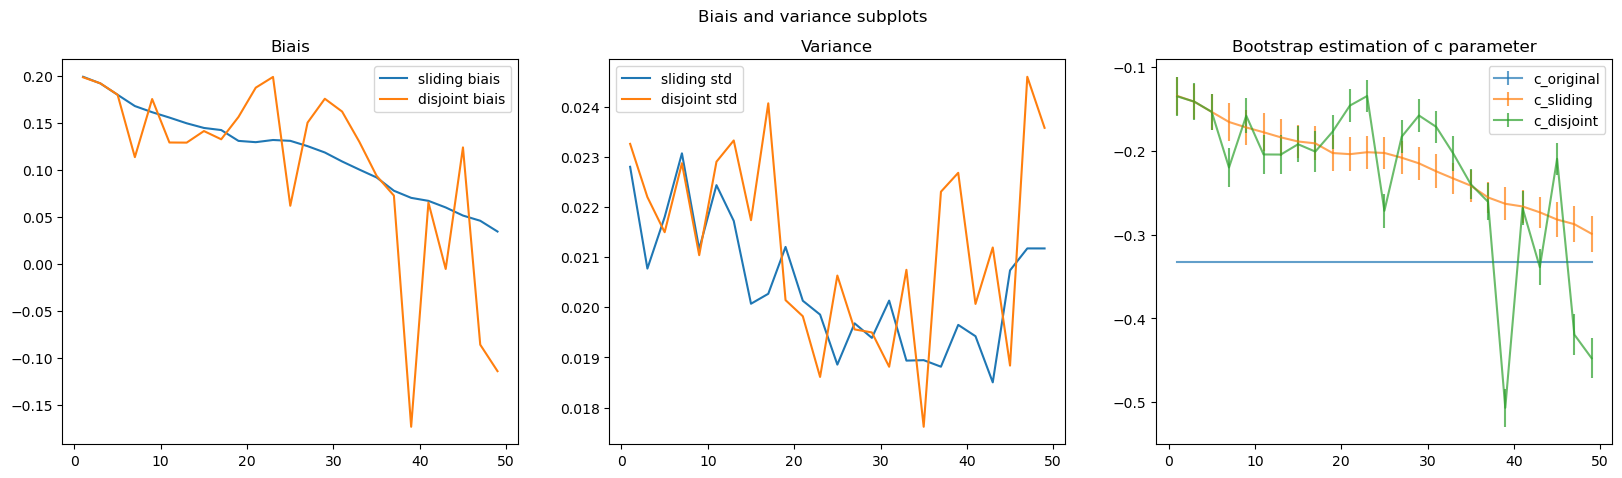

In [6]:
args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 2
}
sampler = get_ma_sample
args_sampler = [3,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks'],
                10]

get_biais_variance_bootstrap(sampler,
                            args_sampler,
                            args_bootstrap,
                            make_plots=True)

100%|██████████| 400/400 [35:30<00:00,  5.33s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8620\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


{'c_original_final_list': array([-0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333,
        -0.33333333, -0.33333333, -0.33333333, -0.33333333, -0.33333333]),
 'c_sliding_final_list': array([-0.16642268, -0.1681098 , -0.17896576, -0.18845243, -0.19549275,
        -0.21360653, -0.22972076, -0.24714948, -0.25952835, -0.2684547 ,
        -0.27674808, -0.2782581 , -0.27504249, -0.27390744, -0.26904728,
        -0.26482553, -0.26679892, -0.26593207, -0.26383552, -0.26100439,
        -0.25886919, -0.24898126, -0.23868971, -0.22870764, -0.22306236]),
 'c_disjoint_final_list': array([-0.16639759, -0.17073253, -0.20840609, -0.17947846, -0.17467321,
        -0.24675817, -0.2499898 , -0.22553555, -0.36752954, -0.30760838,
        -0.30720686, -0.24064258, -0.25953064,

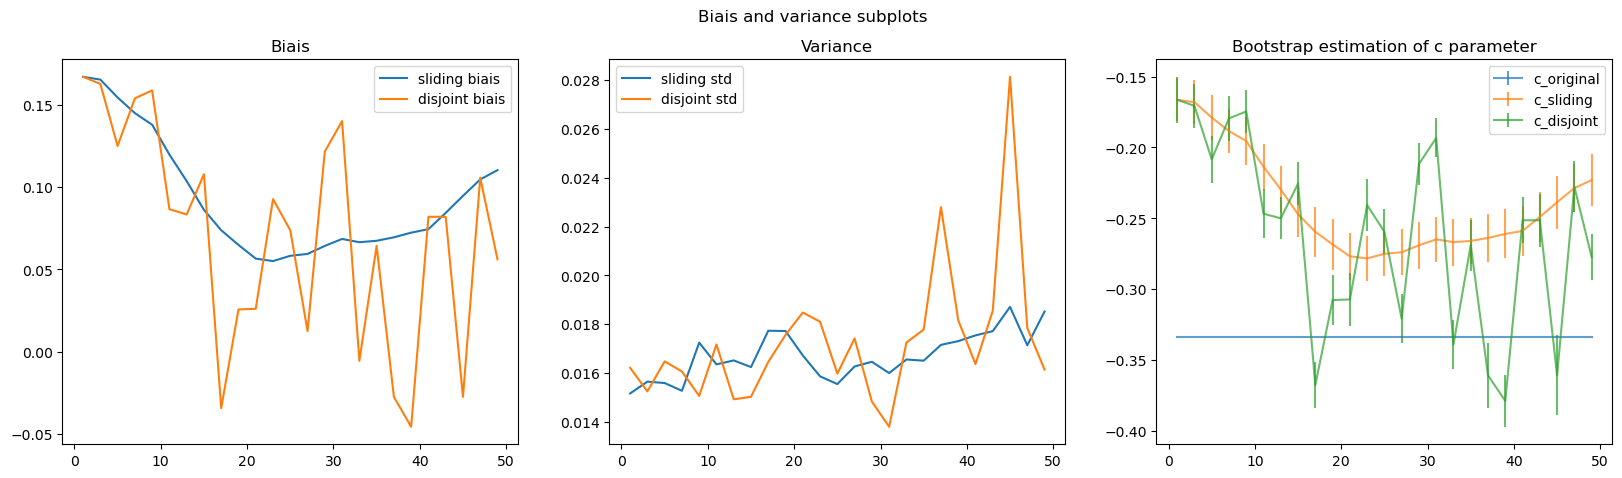

In [7]:
args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 2
}
sampler = get_ma_sample
args_sampler = [3,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks'],
                10]

get_biais_variance_bootstrap(sampler,
                            args_sampler,
                            args_bootstrap,
                            make_plots=True)

In [8]:
args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 2
}
sampler = get_ma_sample
args_sampler = [3,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks'],
                10]

get_biais_variance_bootstrap(sampler,
                            args_bootstrap,
                            args_monte_carlo,
                            make_plots=True)

NameError: name 'args_monte_carlo' is not defined

# Check if bootstrapping in i.i.d. case gives more coherent results
## Try with i.i.d. Frechet

100%|██████████| 400/400 [49:57<00:00,  7.49s/it] 
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8540\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


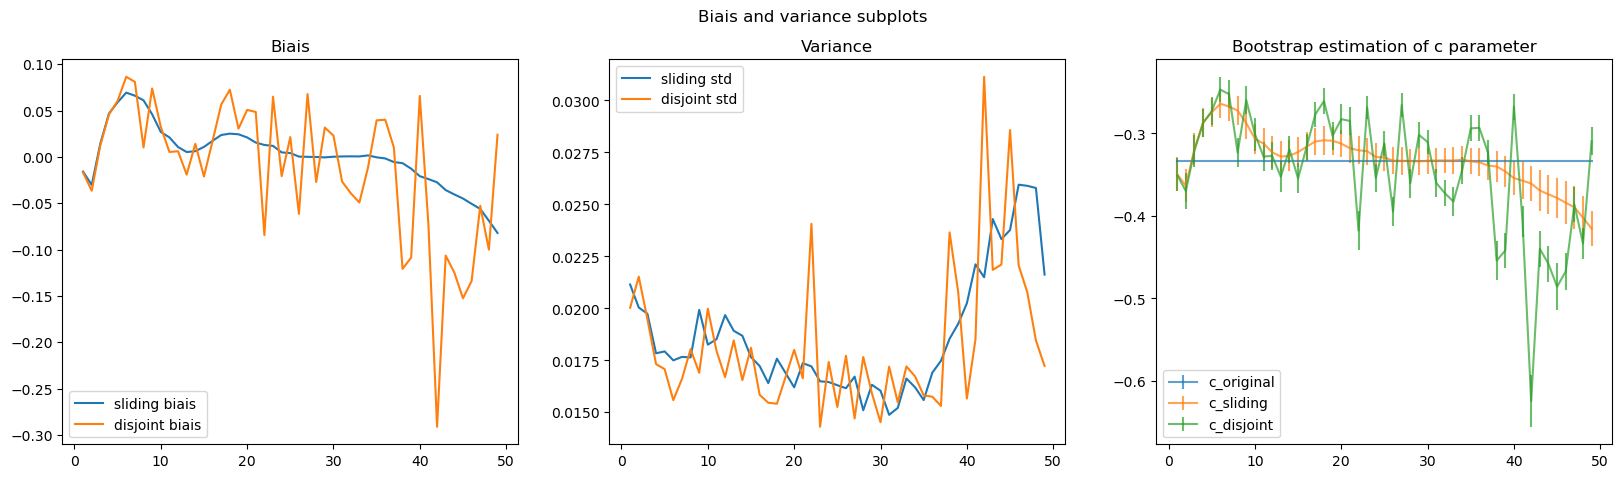

In [4]:
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_frechet_sample

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

100%|██████████| 400/400 [1:04:19<00:00,  9.65s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8540\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


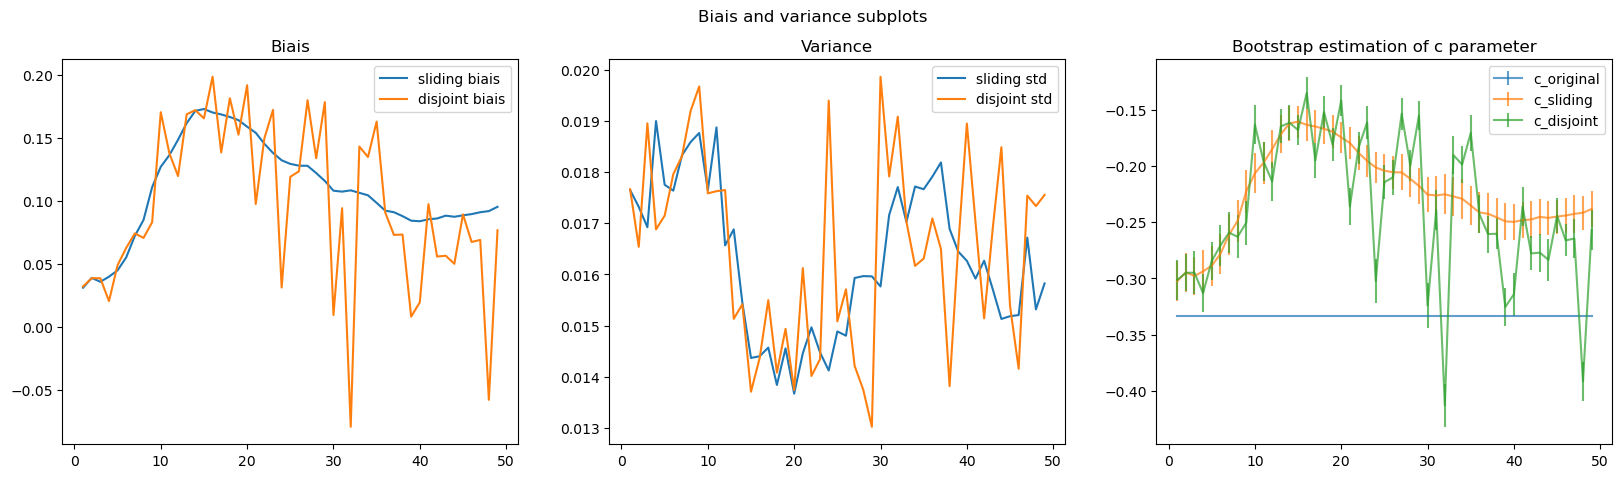

In [5]:
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_frechet_sample

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

100%|██████████| 400/400 [56:15<00:00,  8.44s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8540\3860858066.py:73: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


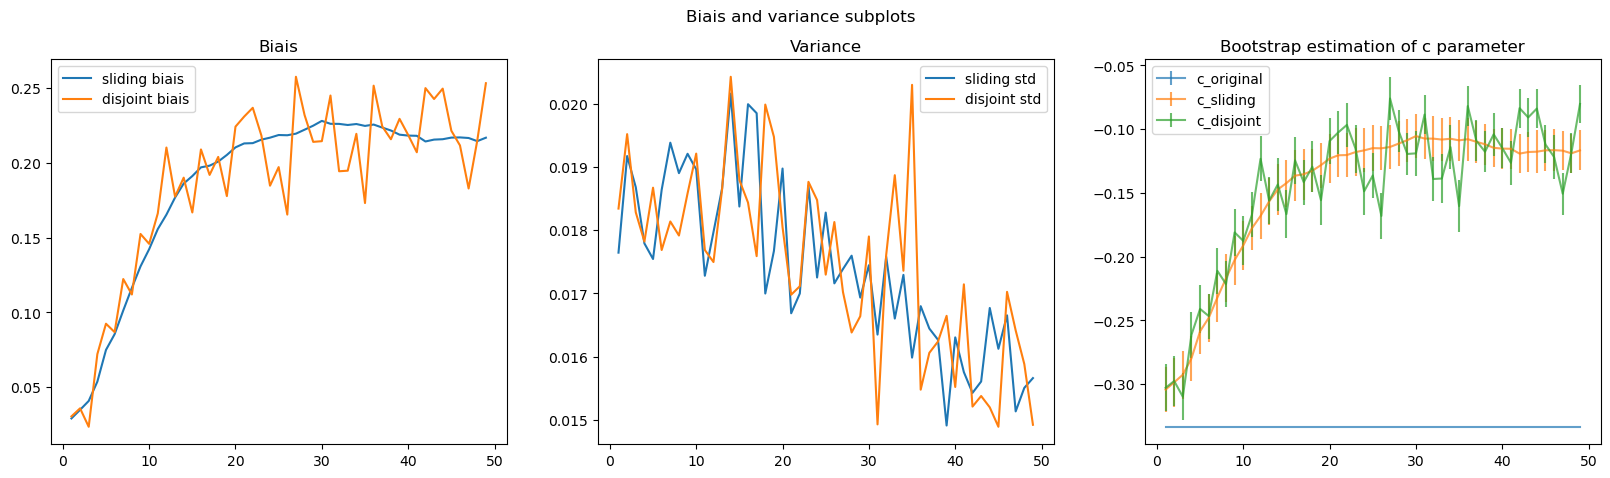

In [6]:
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 400,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_frechet_sample

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

# Try regular bootstrap scheme with i.i.d. Frechet data :
## First we bootstrap the latent sample then we get block maxima
Note that this bootstrap scheme breaks the time dependency for dependent data

In [6]:
def get_biais_variance_bootstrap(sampler,
                                 args_sampler,
                                 args_bootstrap,
                                 make_plots=True):
    nb_bootstrap_estimations = args_bootstrap["nb_bootstrap_estimations"]
    start_block = args_bootstrap["start_block"]
    max_size_blocks = args_bootstrap["max_size_blocks"]
    step_block = args_bootstrap["step_block"]
    inv_gamma = args_sampler[0]

    sample = sampler(*args_sampler)
    for btstrap in tqdm(range(nb_bootstrap_estimations)):
        dict_results = get_bootstrap_before_max_block_scheme_estimations(inv_gamma,sample,start_block,max_size_blocks,step_block)
        if btstrap == 0:
            c_original_results = np.array([dict_results['c_original_list']])
            c_sliding_results = np.array([dict_results['c_sliding_list']])
            c_disjoint_results = np.array([dict_results['c_disjoint_list']])
        else:
            c_original_results = np.append(c_original_results,[ dict_results['c_original_list']],0)
            c_sliding_results = np.append(c_sliding_results, [dict_results['c_sliding_list']],0)
            c_disjoint_results = np.append(c_disjoint_results, [dict_results['c_disjoint_list']],0)
    c_original_final_list = np.mean(c_original_results,axis=0)
    c_sliding_final_list = np.mean(c_sliding_results,axis=0)
    c_disjoint_final_list = np.mean(c_disjoint_results,axis=0)
    c_original_final_errors = np.std(c_original_results,axis=0)
    c_sliding_final_errors = np.std(c_sliding_results,axis=0)
    c_disjoint_final_errors = np.std(c_disjoint_results,axis=0)
    if make_plots:
        block_size_list = dict_results["block_size_list"]
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_figheight(5)
        fig.set_figwidth(20)
        fig.suptitle('Biais and variance subplots')
        ax1.plot(block_size_list, c_sliding_final_list - c_original_final_list, label="sliding biais")
        ax1.plot(block_size_list, c_disjoint_final_list - c_original_final_list, label="disjoint biais")
        ax1.set_title("Biais")
        ax1.legend()
        ax2.plot(block_size_list, c_sliding_final_errors, label="sliding std")
        ax2.plot(block_size_list, c_disjoint_final_errors, label="disjoint std")
        ax2.set_title("Variance")
        ax2.legend()

        ax3.errorbar(block_size_list,c_original_final_list,c_original_final_errors,label="c_original",alpha=0.7)
        ax3.errorbar(block_size_list,c_sliding_final_list,c_sliding_final_errors,label="c_sliding",alpha=0.7)
        ax3.errorbar(block_size_list,c_disjoint_final_list,c_disjoint_final_errors,label="c_disjoint",alpha=0.7)
        ax3.set_title("Bootstrap estimation of c parameter")
        ax3.legend()


        fig.show()
    return {'c_original_final_list': c_original_final_list,
            'c_sliding_final_list': c_sliding_final_list,
            'c_disjoint_final_list': c_disjoint_final_list}

100%|██████████| 100/100 [18:37<00:00, 11.17s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8540\935381296.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


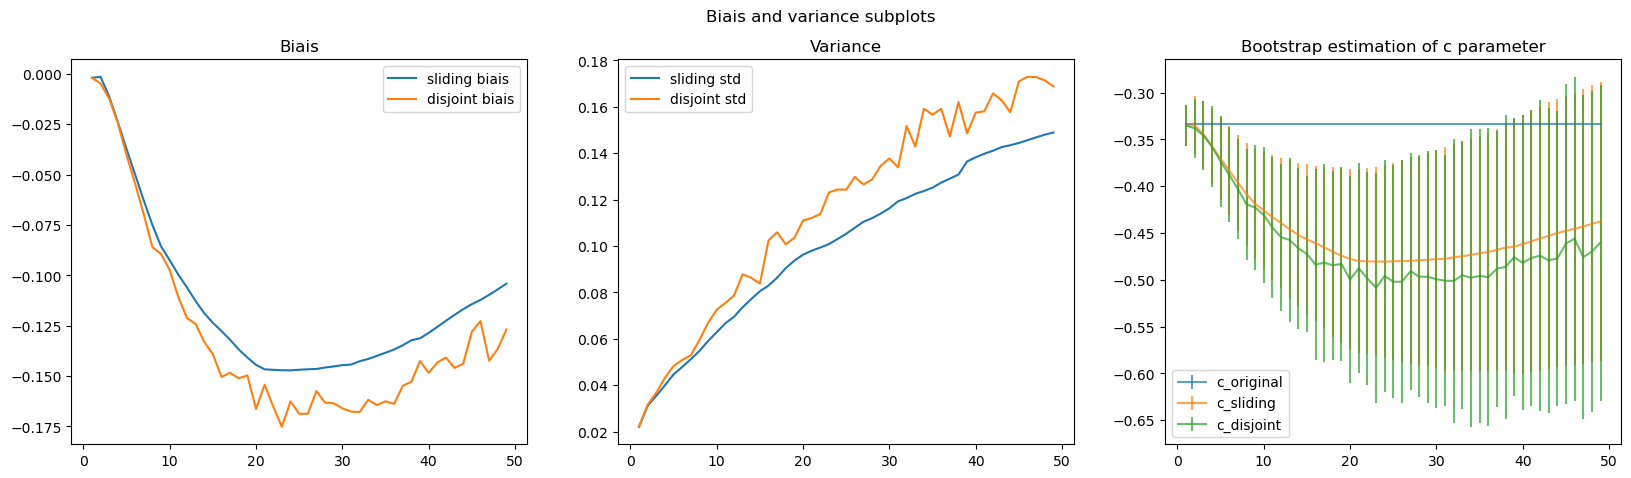

In [13]:
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_frechet_sample

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

100%|██████████| 100/100 [16:30<00:00,  9.91s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8540\935381296.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


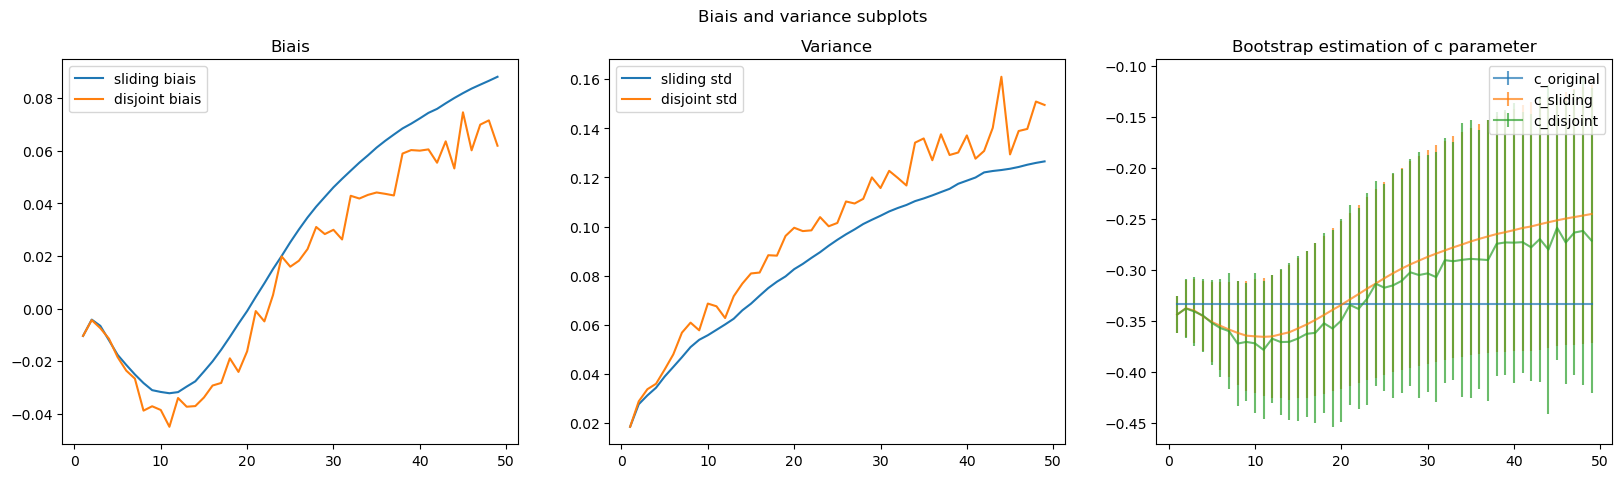

In [15]:
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_frechet_sample

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

100%|██████████| 100/100 [15:00<00:00,  9.01s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8540\935381296.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


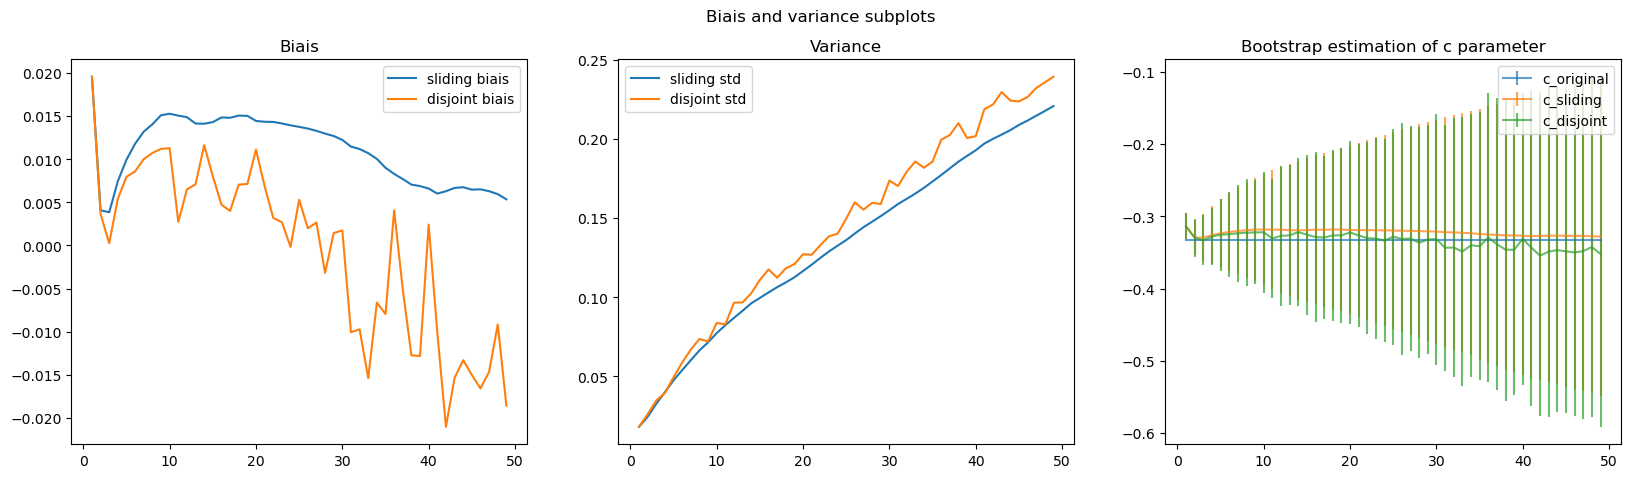

In [16]:
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_frechet_sample

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

## Try this bootstrap-BM scheme on dependent data (even if it breaks the dependency structure)

100%|██████████| 100/100 [16:50<00:00, 10.10s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8540\935381296.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


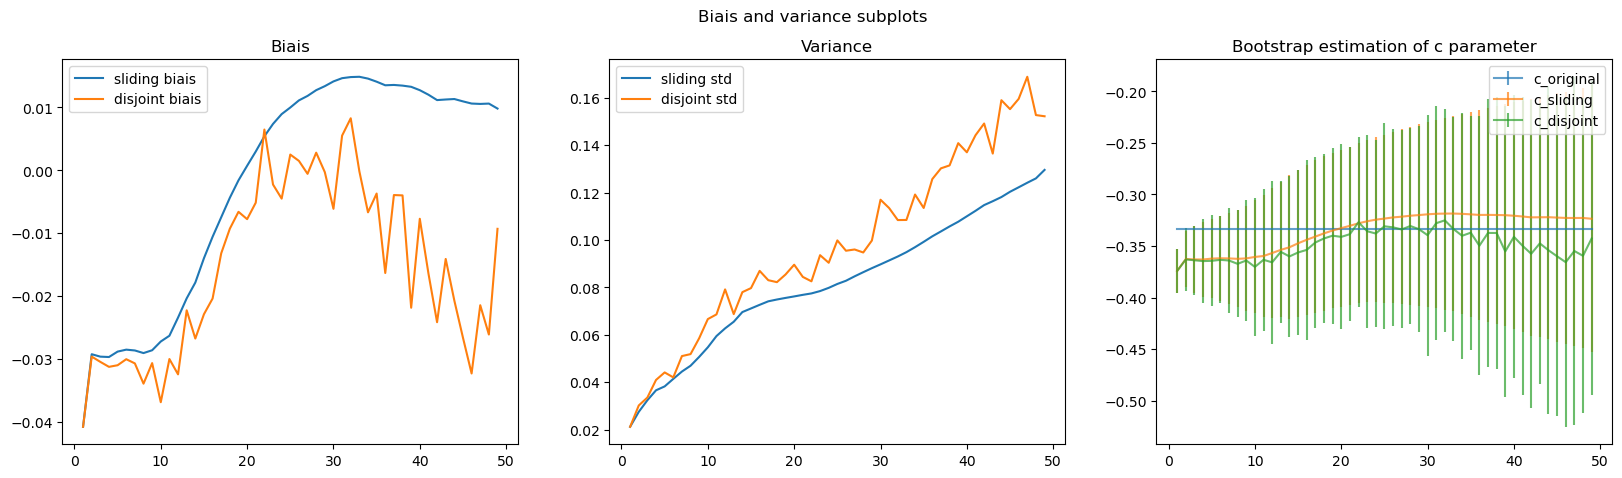

In [17]:
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_armax_bucher_segers_2020

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

100%|██████████| 100/100 [15:19<00:00,  9.19s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8540\935381296.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


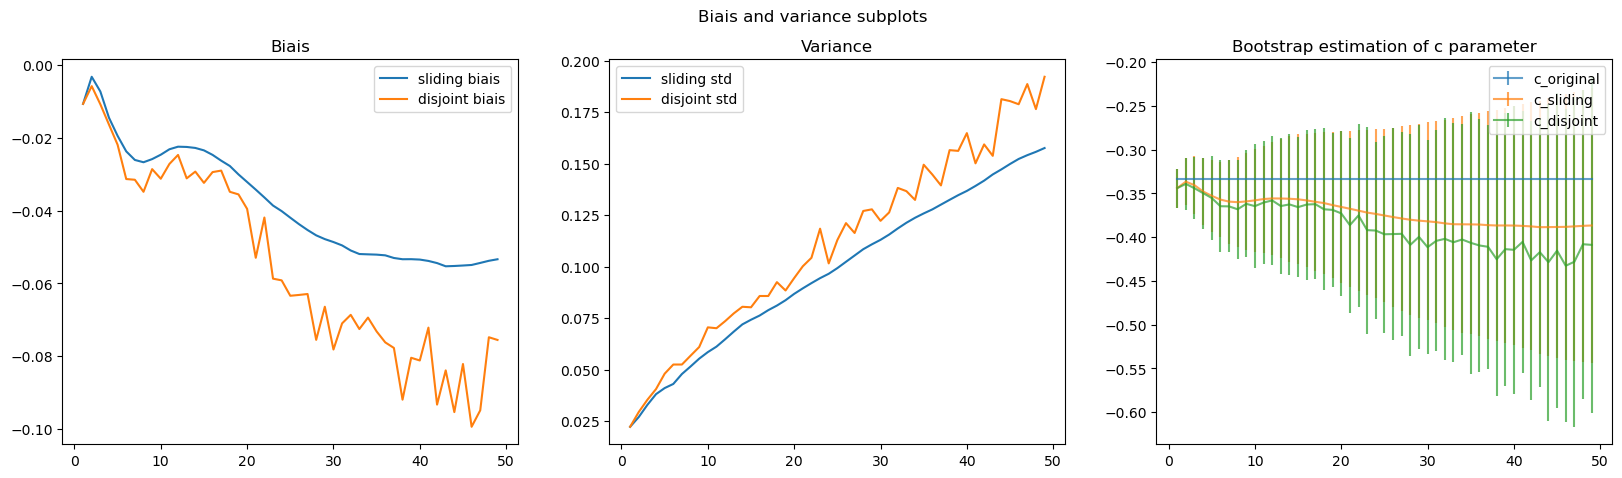

In [32]:
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_armax_bucher_segers_2020

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks']]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

## Get MC estimate of bootstrap-BM scheme
This MC is performed without even shuffling the data (we just get a sample, make the blocks and make the estimation)

In [9]:
def get_monte_carlo_bootstrap_bm_scheme_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True):
    nb_monte_carlo_estimations = args_monte_carlo["nb_monte_carlo_estimations"]
    start_block = args_monte_carlo["start_block"]
    max_size_blocks = args_monte_carlo["max_size_blocks"]
    step_block = args_monte_carlo["step_block"]
    inv_gamma = args_sampler[0]

    for mc in tqdm(range(nb_monte_carlo_estimations)):
        sample = sampler(*args_sampler)
        dict_results = get_block_max_c_estimation(inv_gamma, sample,start_block,max_size_blocks,step_block)
        if mc == 0:
            c_original_results = np.array([dict_results['c_original_list']])
            c_sliding_results = np.array([dict_results['c_sliding_list']])
            c_disjoint_results = np.array([dict_results['c_disjoint_list']])
        else:
            c_original_results = np.append(c_original_results,[ dict_results['c_original_list']],0)
            c_sliding_results = np.append(c_sliding_results, [dict_results['c_sliding_list']],0)
            c_disjoint_results = np.append(c_disjoint_results, [dict_results['c_disjoint_list']],0)
    c_original_final_list = np.mean(c_original_results,axis=0)
    c_sliding_final_list = np.mean(c_sliding_results,axis=0)
    c_disjoint_final_list = np.mean(c_disjoint_results,axis=0)
    c_original_final_errors = np.std(c_original_results,axis=0)
    c_sliding_final_errors = np.std(c_sliding_results,axis=0)
    c_disjoint_final_errors = np.std(c_disjoint_results,axis=0)
    if make_plots:
        block_size_list = dict_results["block_size_list"]
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_figheight(5)
        fig.set_figwidth(20)
        fig.suptitle('Biais and variance subplots')
        ax1.plot(block_size_list, c_sliding_final_list - c_original_final_list, label="sliding biais")
        ax1.plot(block_size_list, c_disjoint_final_list - c_original_final_list, label="disjoint biais")
        ax1.set_title("Biais")
        ax1.legend()
        ax2.plot(block_size_list, c_sliding_final_errors, label="sliding std")
        ax2.plot(block_size_list, c_disjoint_final_errors, label="disjoint std")
        ax2.set_title("Variance")
        ax2.legend()

        ax3.errorbar(block_size_list,c_original_final_list,c_original_final_errors,label="c_original",alpha=0.7)
        ax3.errorbar(block_size_list,c_sliding_final_list,c_sliding_final_errors,label="c_sliding",alpha=0.7)
        ax3.errorbar(block_size_list,c_disjoint_final_list,c_disjoint_final_errors,label="c_disjoint",alpha=0.7)
        ax3.set_title("Bootstrap estimation of c parameter")
        ax3.legend()
        fig.show()
    return {'c_original_final_list': c_original_final_list,
            'c_sliding_final_list': c_sliding_final_list,
            'c_disjoint_final_list': c_disjoint_final_list}


100%|██████████| 100/100 [12:47<00:00,  7.67s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8540\980841092.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


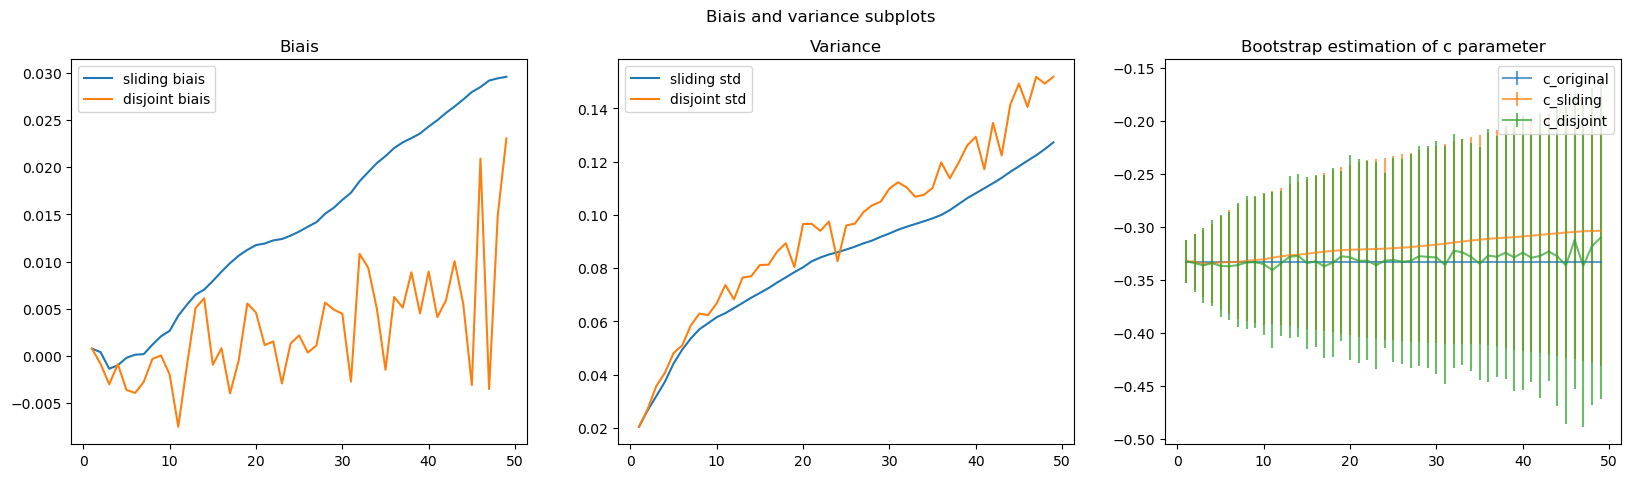

In [30]:
args_monte_carlo = {
    'nb_monte_carlo_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_armax_bucher_segers_2020
args_sampler = [3,
                args_monte_carlo['min_size_sample_bloc_maxima']*args_monte_carlo['max_size_blocks']]

_ = get_monte_carlo_bootstrap_bm_scheme_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True)

## Try with MA(5) frechet

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [11:39<00:00,  7.00s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_8140\935381296.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


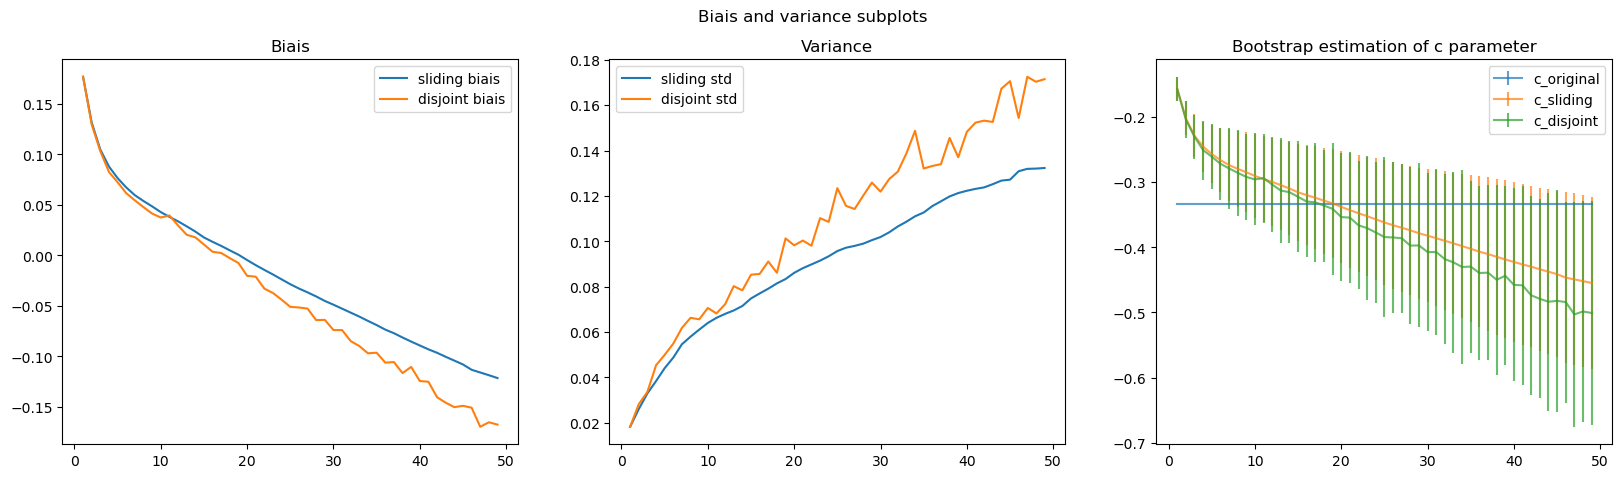

In [6]:
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_ma_sample

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks'],
                5]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [13:43<00:00,  8.23s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_18116\935381296.py:51: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


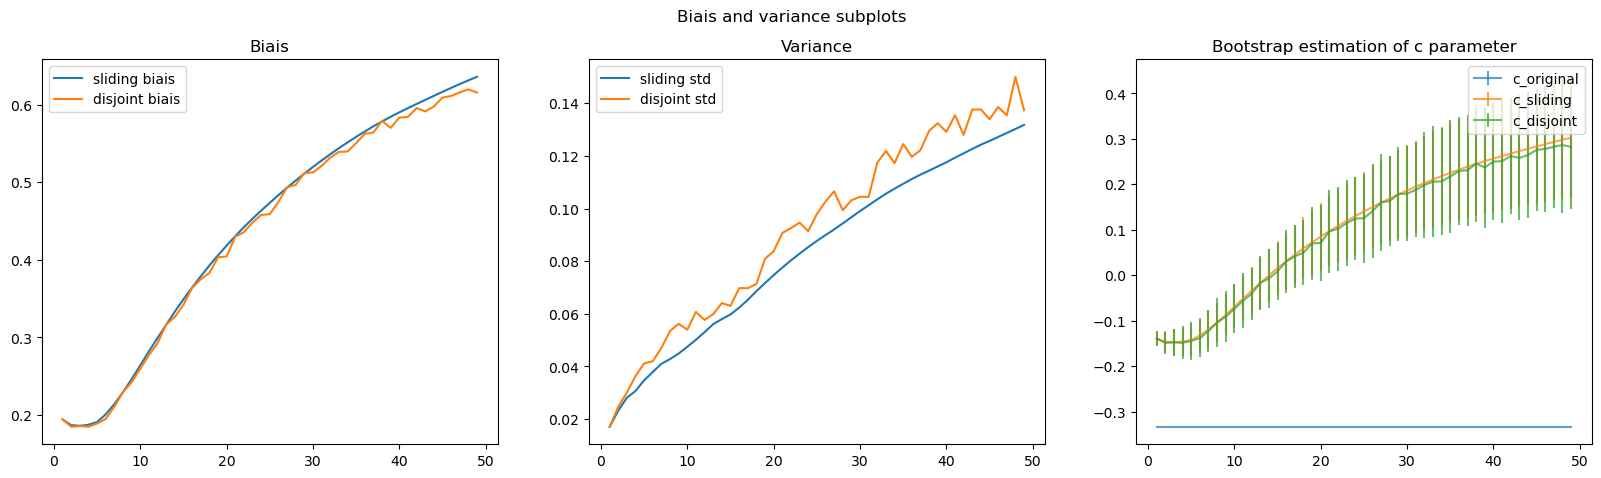

In [7]:
inv_gamma = 3

args_bootstrap = {
    'nb_bootstrap_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_ma_sample

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks'],
                5]

_ = get_biais_variance_bootstrap(sampler,
                                args_sampler,
                                args_bootstrap,
                                make_plots=True)

100%|██████████| 100/100 [14:26<00:00,  8.66s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_18116\980841092.py:49: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


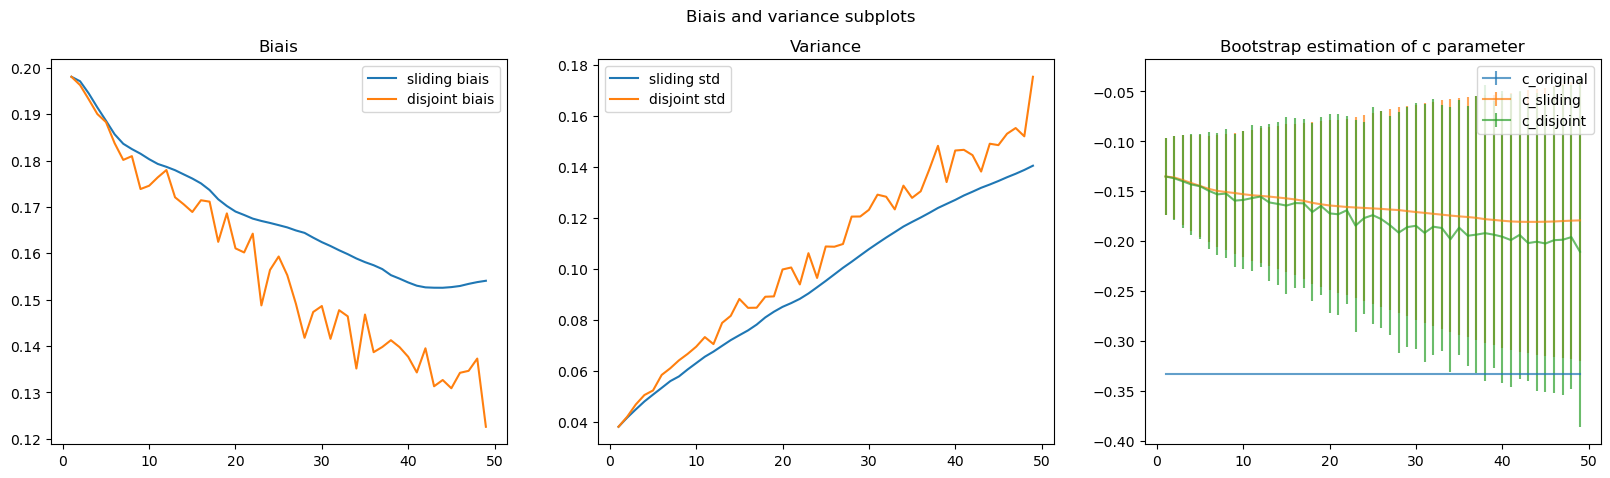

In [10]:
# Monte Carlo
args_monte_carlo = {
    'nb_monte_carlo_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_ma_sample

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks'],
                5]

_ = get_monte_carlo_bootstrap_bm_scheme_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True)

## Last experience : we check MC behaviour with shuffling (to see if we have different results)

In [11]:
def get_monte_carlo_bootstrap_bm_scheme_with_shuffling_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True):

    nb_monte_carlo_estimations = args_monte_carlo["nb_monte_carlo_estimations"]
    start_block = args_monte_carlo["start_block"]
    max_size_blocks = args_monte_carlo["max_size_blocks"]
    step_block = args_monte_carlo["step_block"]
    inv_gamma = args_sampler[0]

    for mc in tqdm(range(nb_monte_carlo_estimations)):
        sample = sampler(*args_sampler)
        dict_results = get_bootstrap_before_max_block_scheme_estimations(inv_gamma,
                                                                         sample,start_block,
                                                                         max_size_blocks,step_block)
        if mc == 0:
            c_original_results = np.array([dict_results['c_original_list']])
            c_sliding_results = np.array([dict_results['c_sliding_list']])
            c_disjoint_results = np.array([dict_results['c_disjoint_list']])
        else:
            c_original_results = np.append(c_original_results,[ dict_results['c_original_list']],0)
            c_sliding_results = np.append(c_sliding_results, [dict_results['c_sliding_list']],0)
            c_disjoint_results = np.append(c_disjoint_results, [dict_results['c_disjoint_list']],0)
    c_original_final_list = np.mean(c_original_results,axis=0)
    c_sliding_final_list = np.mean(c_sliding_results,axis=0)
    c_disjoint_final_list = np.mean(c_disjoint_results,axis=0)
    c_original_final_errors = np.std(c_original_results,axis=0)
    c_sliding_final_errors = np.std(c_sliding_results,axis=0)
    c_disjoint_final_errors = np.std(c_disjoint_results,axis=0)
    if make_plots:
        block_size_list = dict_results["block_size_list"]
        
        fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
        fig.set_figheight(5)
        fig.set_figwidth(20)
        fig.suptitle('Biais and variance subplots')
        ax1.plot(block_size_list, c_sliding_final_list - c_original_final_list, label="sliding biais")
        ax1.plot(block_size_list, c_disjoint_final_list - c_original_final_list, label="disjoint biais")
        ax1.set_title("Biais")
        ax1.legend()
        ax2.plot(block_size_list, c_sliding_final_errors, label="sliding std")
        ax2.plot(block_size_list, c_disjoint_final_errors, label="disjoint std")
        ax2.set_title("Variance")
        ax2.legend()

        ax3.errorbar(block_size_list,c_original_final_list,c_original_final_errors,label="c_original",alpha=0.7)
        ax3.errorbar(block_size_list,c_sliding_final_list,c_sliding_final_errors,label="c_sliding",alpha=0.7)
        ax3.errorbar(block_size_list,c_disjoint_final_list,c_disjoint_final_errors,label="c_disjoint",alpha=0.7)
        ax3.set_title("Bootstrap estimation of c parameter")
        ax3.legend()
        fig.show()
    return {'c_original_final_list': c_original_final_list,
            'c_sliding_final_list': c_sliding_final_list,
            'c_disjoint_final_list': c_disjoint_final_list}


100%|██████████| 100/100 [15:19<00:00,  9.19s/it]
C:\Users\Antoine\AppData\Local\Temp\ipykernel_18116\288995048.py:52: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


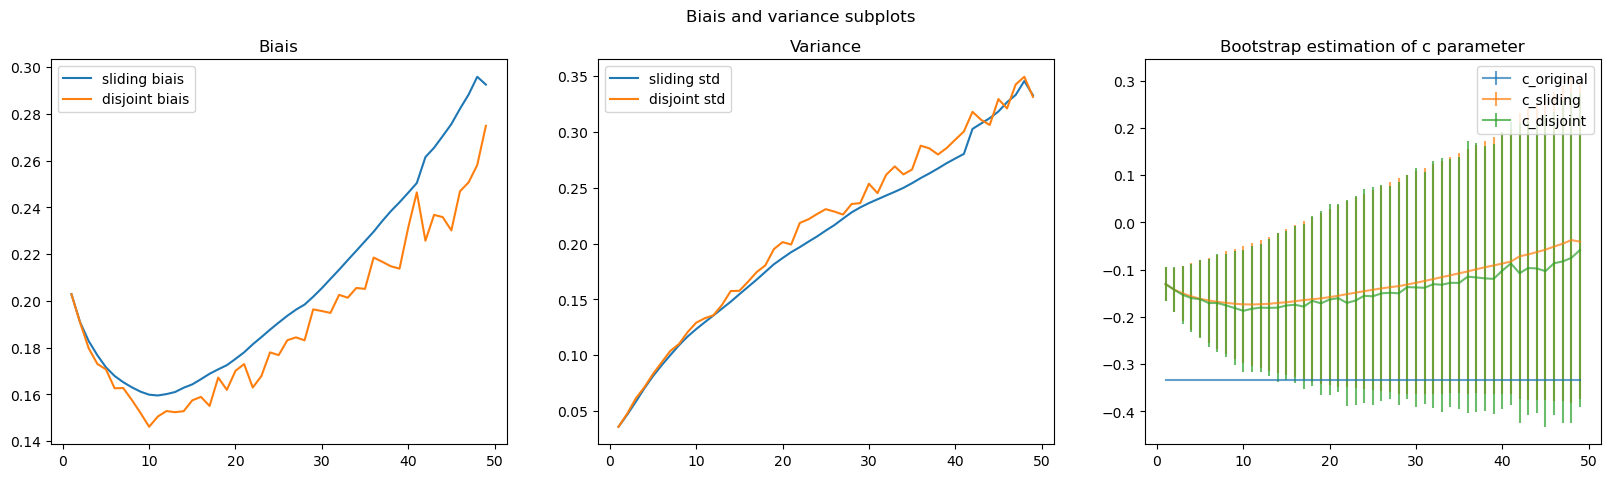

In [12]:
# Monte Carlo
args_monte_carlo = {
    'nb_monte_carlo_estimations': 100,
    'max_size_blocks': 50,
    'min_size_sample_bloc_maxima': 40,
    'start_block': 1,
    'step_block': 1
}
# order_of_dependency = 5 # Not used in armax
sampler = get_ma_sample

args_sampler = [inv_gamma,
                args_bootstrap['min_size_sample_bloc_maxima']*args_bootstrap['max_size_blocks'],
                5]

_ = get_monte_carlo_bootstrap_bm_scheme_with_shuffling_c_estimations(sampler,
                                            args_sampler,
                                            args_monte_carlo,
                                            make_plots=True)